## Project 1 Exploratory Analysis 

The goal of this notebook is to perform exploratory analysis on the wines datasets in order to create a classification model for identifying the quality of a wine based on the features in the dataset. 

Plan of action:
- Study each attribute and it's characteristics
- Visualize the data and explore correlations between attributes
- Identify transformations that may help with data analysis
- Apply Transformations
- Feature Selection
- Feature engineering
- Feature Scaling
- Train three models (Logistic, Decision Tree, Random forest) using standard parameters and compare
- Select the best model and fine-tune

The quality of the wine is based upon sensory data and is scored on a scale of 0 to 10, 0 being the lowest quality and 10 being the highest. The categories for good, okay, and bad wine are based on this scale, with 1-4 being bad, 5-6 being okay, and 7-10 being good. (while the range of possible scores is 10, the actual scores span 3 to 9, which is why the data is split into these groups).

In [1]:
#import libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns #for visualizations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
import collections
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import confusion_matrix #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel


In [2]:
#import my data
winesdf = pd.read_csv('./WinesData.csv')
winesdf

Unnamed: 0  fixed acidity  volatile acidity  citric acid  \
0              0            7.4              0.70         0.00   
1              1            7.8              0.88         0.00   
2              2            7.8              0.76         0.04   
3              3           11.2              0.28         0.56   
4              4            7.4              0.70         0.00   
...          ...            ...               ...          ...   
6492        4893            6.2              0.21         0.29   
6493        4894            6.6              0.32         0.36   
6494        4895            6.5              0.24         0.19   
6495        4896            5.5              0.29         0.30   
6496        4897            6.0              0.21         0.38   

      residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0                1.9      0.076                 11.0                  34.0   
1                2.6      0.098                 25.0                  67.0   
2                2.3      0.092                 15.0                  54.0   
3                1.9      0.075                 17.0                  60.0   
4                1.9      0.076                 11.0                  34.0   
...              ...        ...                  ...                   ...   
6492             1.6      0.039                 24.0                  92.0   
6493             8.0      0.047                 57.0                 168.0   
6494             1.2      0.041                 30.0                 111.0   
6495             1.1      0.022                 20.0                 110.0   
6496             0.8      0.020                 22.0                  98.0   

      density    pH  sulphates  alcohol  type      categories  
0     0.99780  3.51       0.56      9.4     1  just okay wine  
1     0.99680  3.20       0.68      9.8     1  just okay wine  
2     0.99700  3.26       0.65      9.8     1  just okay wine  
3     0.99800  3.16       0.58      9.8     1  just okay wine  
4     0.99780  3.51       0.56      9.4     1  just okay wine  
...       ...   ...        ...      ...   ...             ...  
6492  0.99114  3.27       0.50     11.2     0  just okay wine  
6493  0.99490  3.15       0.46      9.6     0  just okay wine  
6494  0.99254  2.99       0.46      9.4     0  just okay wine  
6495  0.98869  3.34       0.38     12.8     0       good wine  
6496  0.98941  3.26       0.32     11.8     0  just okay wine  

[6497 rows x 14 columns]

In [3]:
winesdf.drop('Unnamed: 0', axis=1, inplace = True)
winesdf.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type', 'categories'],
      dtype='object')

Initial Data and Attribute inspection:

In [4]:
winesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  type                  6497 non-null   int64  
 12  categories            6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
winesdf.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol         type  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     0.246114  
std       0.160787     0.148806     1.192712     0.430779  
min       2.720000     0.220000     8.000000     0.000000  
25%       3.110000     0.430000     9.500000     0.000000  
50%       3.210000     0.510000    10.300000     0.000000  
75%       3.320000     0.600000    11.300000     0.000000  
max       4.010000     2.000000    14.900000     1.000000

The ranges on the attributes are fairly variable and so feature scaling will need to occur before we fit a model. The two options are min-max scaling, or normalization, which scales features to a range of 0 to 1, and standardization, which is less affected by outliers but is not bound by specific value ranges

In [6]:
winesdf['categories'].value_counts()

just okay wine    4974
good wine         1277
bad wine           246
Name: categories, dtype: int64

In [7]:
print('Just okay wine: ' + str(round((4974/(4974+1277+246))*100)) +' percent \r\n' + 'Good wine: ' + str(round((1277/(4974+1277+246))*100)) +' percent \r\n' + 'Bad wine: ' + str(round((246/(4974+1277+246))*100)) +' percent \r\n' )

Just okay wine: 77 percent 
Good wine: 20 percent 
Bad wine: 4 percent 



In [8]:
from sklearn.preprocessing import LabelEncoder

varlist = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol','type']

le = LabelEncoder()
le.fit(winesdf['categories'])
y = le.transform(winesdf['categories'])
X = winesdf[varlist]

In [9]:
#Correlation Matrix
winesdf.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
type                       0.486740          0.653036    -0.187397   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.111981   0.298195            -0.282735   
volatile acidity           -0.196011   0.377124            -0.352557   
citric acid                 0.142451   0.038998             0.133126   
residual sugar              1.000000  -0.128940             0.402871   
chlorides                  -0.128940   1.000000            -0.195045   
free sulfur dioxide         0.402871  -0.195045             1.000000   
total sulfur dioxide        0.495482  -0.279630             0.720934   
density                     0.552517   0.362615             0.025717   
pH                         -0.267320   0.044708            -0.145854   
sulphates                  -0.185927   0.395593            -0.188457   
alcohol                    -0.359415  -0.256916            -0.179838   
type                       -0.348821   0.512678            -0.471644   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.329054  0.458910 -0.252700   0.299568   
volatile acidity                 -0.414476  0.271296  0.261454   0.225984   
citric acid                       0.195242  0.096154 -0.329808   0.056197   
residual sugar                    0.495482  0.552517 -0.267320  -0.185927   
chlorides                        -0.279630  0.362615  0.044708   0.395593   
free sulfur dioxide               0.720934  0.025717 -0.145854  -0.188457   
total sulfur dioxide              1.000000  0.032395 -0.238413  -0.275727   
density                           0.032395  1.000000  0.011686   0.259478   
pH                               -0.238413  0.011686  1.000000   0.192123   
sulphates                        -0.275727  0.259478  0.192123   1.000000   
alcohol                          -0.265740 -0.686745  0.121248  -0.003029   
type                             -0.700357  0.390645  0.329129   0.487218   

                       alcohol      type  
fixed acidity        -0.095452  0.486740  
volatile acidity     -0.037640  0.653036  
citric acid          -0.010493 -0.187397  
residual sugar       -0.359415 -0.348821  
chlorides            -0.256916  0.512678  
free sulfur dioxide  -0.179838 -0.471644  
total sulfur dioxide -0.265740 -0.700357  
density              -0.686745  0.390645  
pH                    0.121248  0.329129  
sulphates            -0.003029  0.487218  
alcohol               1.000000 -0.032970  
type                 -0.032970  1.000000

Based on the correlation matrix from the data cleaning stage, quality appears to be most related to volitile acidity, chlorides, density, alcohol, and potentially type. Based on this matrix, alcohol seems to be very related with density, chlorides, pH, and residual sugar. Volitile acidity and fixed acidity are fairly highly correlated with everything except alcohol, as is residual sugar.

This will be useful for feature selection later.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028FCD4EC2E0>,
      dtype=object)

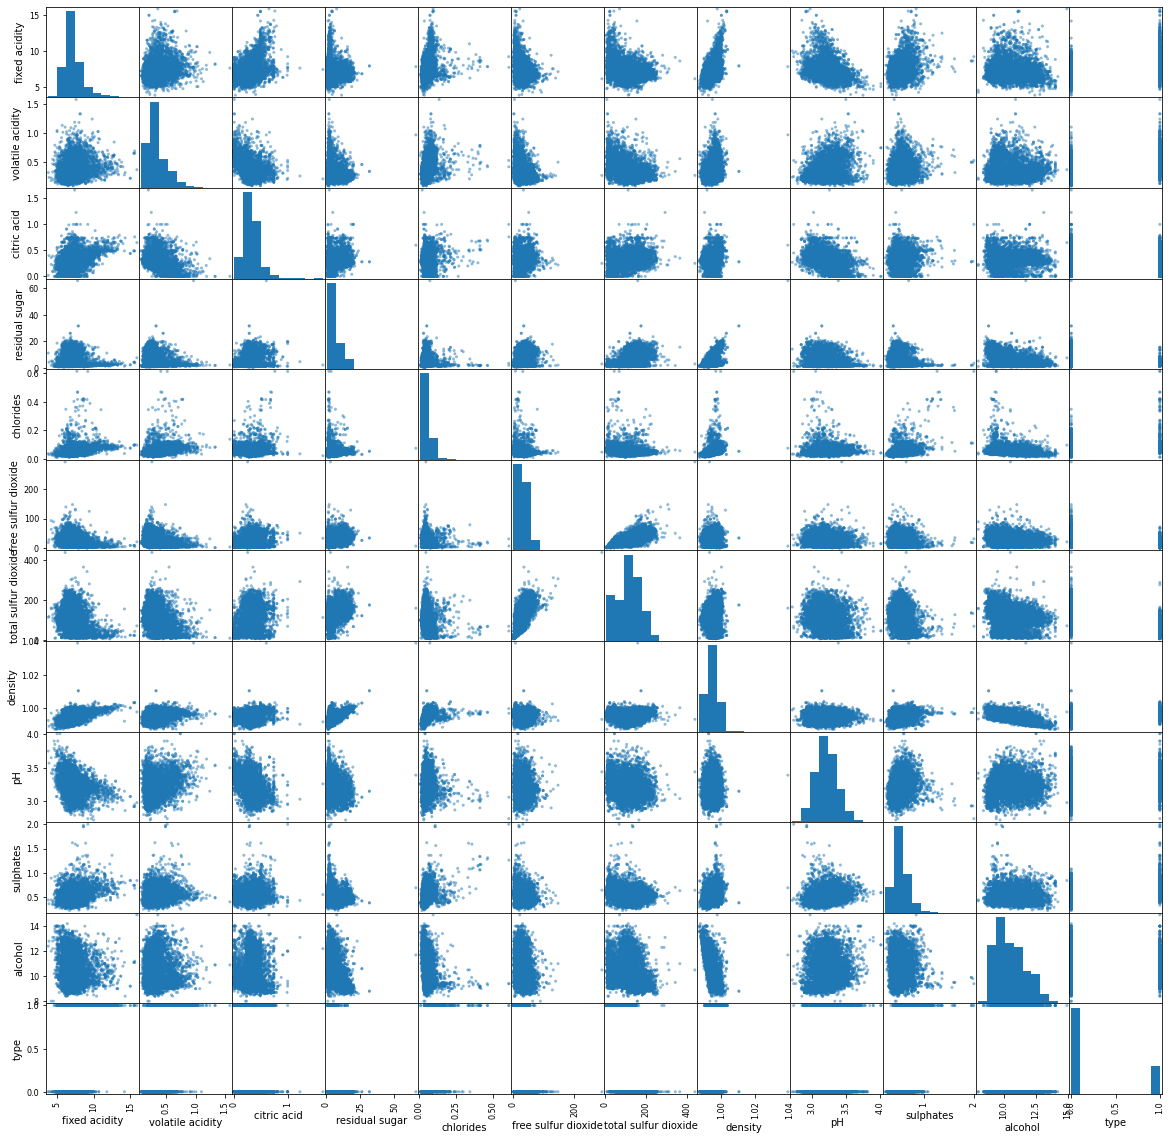

In [10]:
scatter_matrix(X, figsize =(20,20))

Next I will handle balancing the data before performing scaling

Based on the percentage calcs above, I know that my dataset is very unbalanced. I will test out some oversampling methods in an attempt to improve this issue. The methods tried are from https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html#from-random-over-sampling-to-smote-and-adasyn

I anticipate that ADASYN will work best given the statement: '...the difference between ADASYN and SMOTE. ADASYN will focus on the samples which are difficult to classify with a nearest-neighbors rule while regular SMOTE will not make any distinction. Therefore, the decision function depending of the algorithm.'

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 10152020, stratify = y )

In [12]:
X_train.shape

(6172, 12)

In [13]:
X_test.shape

(325, 12)

In [14]:
X_resampled_SMOTE, y_resampled_SMOTE = SMOTE().fit_resample(X_train, y_train)
print(sorted(collections.Counter(y_resampled_SMOTE).items()))
X_resampled_ADASYN, y_resampled_ADASYN = ADASYN().fit_resample(X_train, y_train)
print(sorted(collections.Counter(y_resampled_SMOTE).items()))

[(0, 4725), (1, 4725), (2, 4725)]
[(0, 4725), (1, 4725), (2, 4725)]


In [15]:
std_scaler = StandardScaler()

#I am choosing to do a standardization scale in order to avoid the impact of any outliers
std_scaler.fit(X_resampled_SMOTE) ## training_mean and std calculated
X_train_scaled_SMOTE = std_scaler.transform(X_resampled_SMOTE) ## only use training mean and std
X_test_scaled_SMOTE  = std_scaler.transform(X_test)
std_scaler.fit(X_resampled_ADASYN) ## training_mean and std calculated
X_train_scaled_ADASYN = std_scaler.transform(X_resampled_ADASYN) ## only use training mean and std
X_test_scaled_ADASYN  = std_scaler.transform(X_test)

Now that I have my data in the format I want it, I will start testing models, keeping in mind that the accuracy I am for is better than 77% (ie. if I just marked all wines as just okay)
Just okay wine: 77 percent 
Good wine: 20 percent 
Bad wine: 4 percent 

I will start with Linear Regression:

In [16]:
from sklearn.linear_model import LogisticRegression #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
logreg_SMOTE = LogisticRegression(max_iter=10000, random_state = 10152020)
logreg_SMOTE.fit(X_train_scaled_SMOTE, y_resampled_SMOTE)
print('Accuracy of Logistic regression classifier on training set resampled with SMOTE methods: {:.2f}'
     .format(logreg_SMOTE.score(X_train, y_train)))

Accuracy of Logistic regression classifier on training set resampled with SMOTE methods: 0.57


In [17]:
from sklearn.linear_model import LogisticRegression #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
logreg_ADASYN = LogisticRegression(max_iter=10000, random_state = 10152020)
logreg_ADASYN.fit(X_train_scaled_ADASYN, y_resampled_ADASYN)
print('Accuracy of Logistic regression classifier on training set resampled with ADASYN methods: {:.2f}'
     .format(logreg_ADASYN.score(X_train, y_train)))

Accuracy of Logistic regression classifier on training set resampled with ADASYN methods: 0.60


As expected, the ADASYN gave me a better accuracy than the SMOTE. I will try both with the Decision tree and random forest methods before proceeding

Accuracy of Decision Tree classifier on training set resampled with SMOTE methods: 0.20


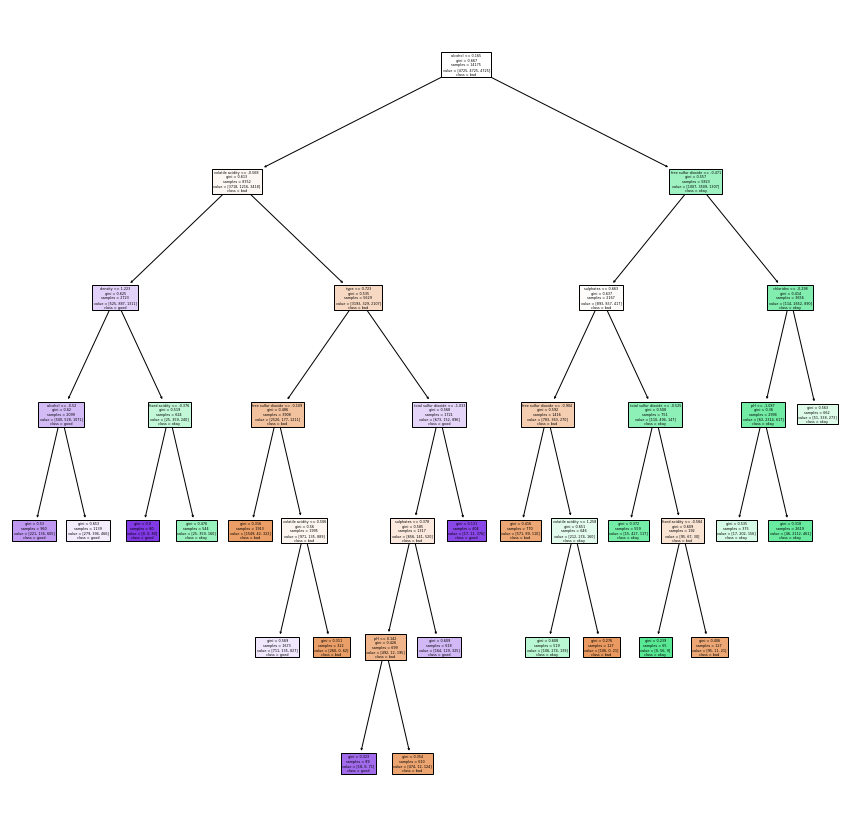

In [18]:
#Decision Tree Models

estimator_DTSMOTE = tree.DecisionTreeClassifier(max_leaf_nodes = 20, random_state =  10152020)
estimator_DTSMOTE = estimator_DTSMOTE.fit(X_train_scaled_SMOTE, y_resampled_SMOTE)

fig = plt.figure(figsize= (15,15))
_ = tree.plot_tree(estimator_DTSMOTE, 
                   feature_names= varlist,
                   class_names = ['bad', 'okay', 'good'],
                    filled=True)

print('Accuracy of Decision Tree classifier on training set resampled with SMOTE methods: {:.2f}'
     .format(estimator_DTSMOTE.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set resampled with ADASYN methods: 0.20


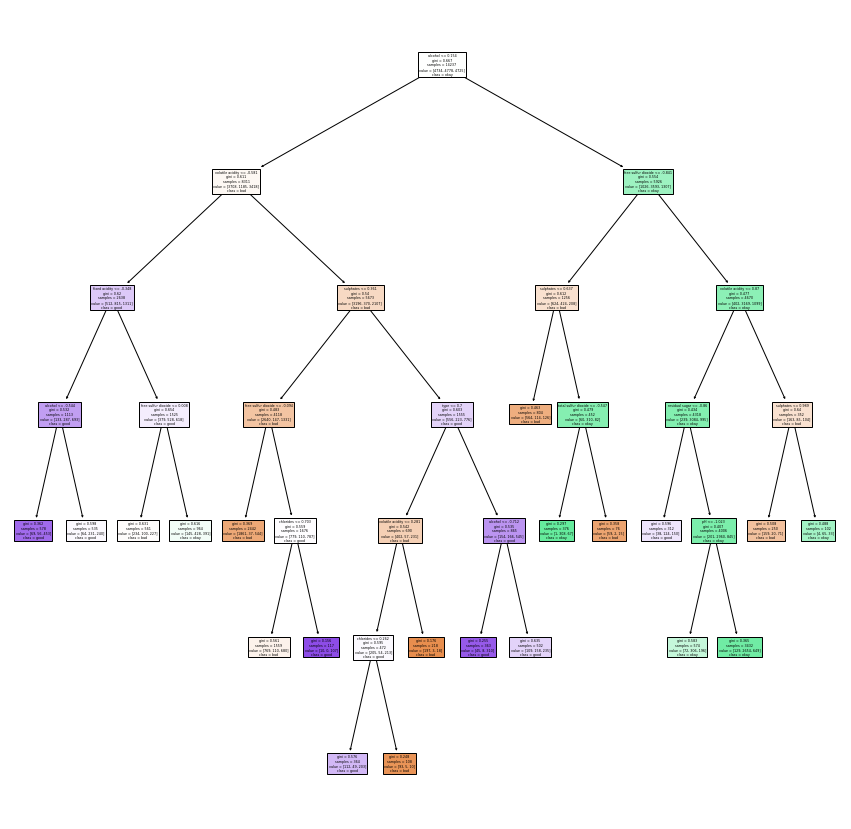

In [19]:
estimator_DTADASYN = tree.DecisionTreeClassifier(max_leaf_nodes = 20, random_state =  10152020)
estimator_DTADASYN = estimator_DTADASYN.fit(X_train_scaled_ADASYN, y_resampled_ADASYN)

fig = plt.figure(figsize= (15,15))
_ = tree.plot_tree(estimator_DTADASYN, 
                   feature_names= varlist,
                   class_names = ['bad', 'okay', 'good'],
                    filled=True)

print('Accuracy of Decision Tree classifier on training set resampled with ADASYN methods: {:.2f}'
     .format(estimator_DTSMOTE.score(X_train, y_train)))

Finally, I will test a random forest model on the data

Accuracy of Random Forest classifier on training set resampled with SMOTE methods: 0.20


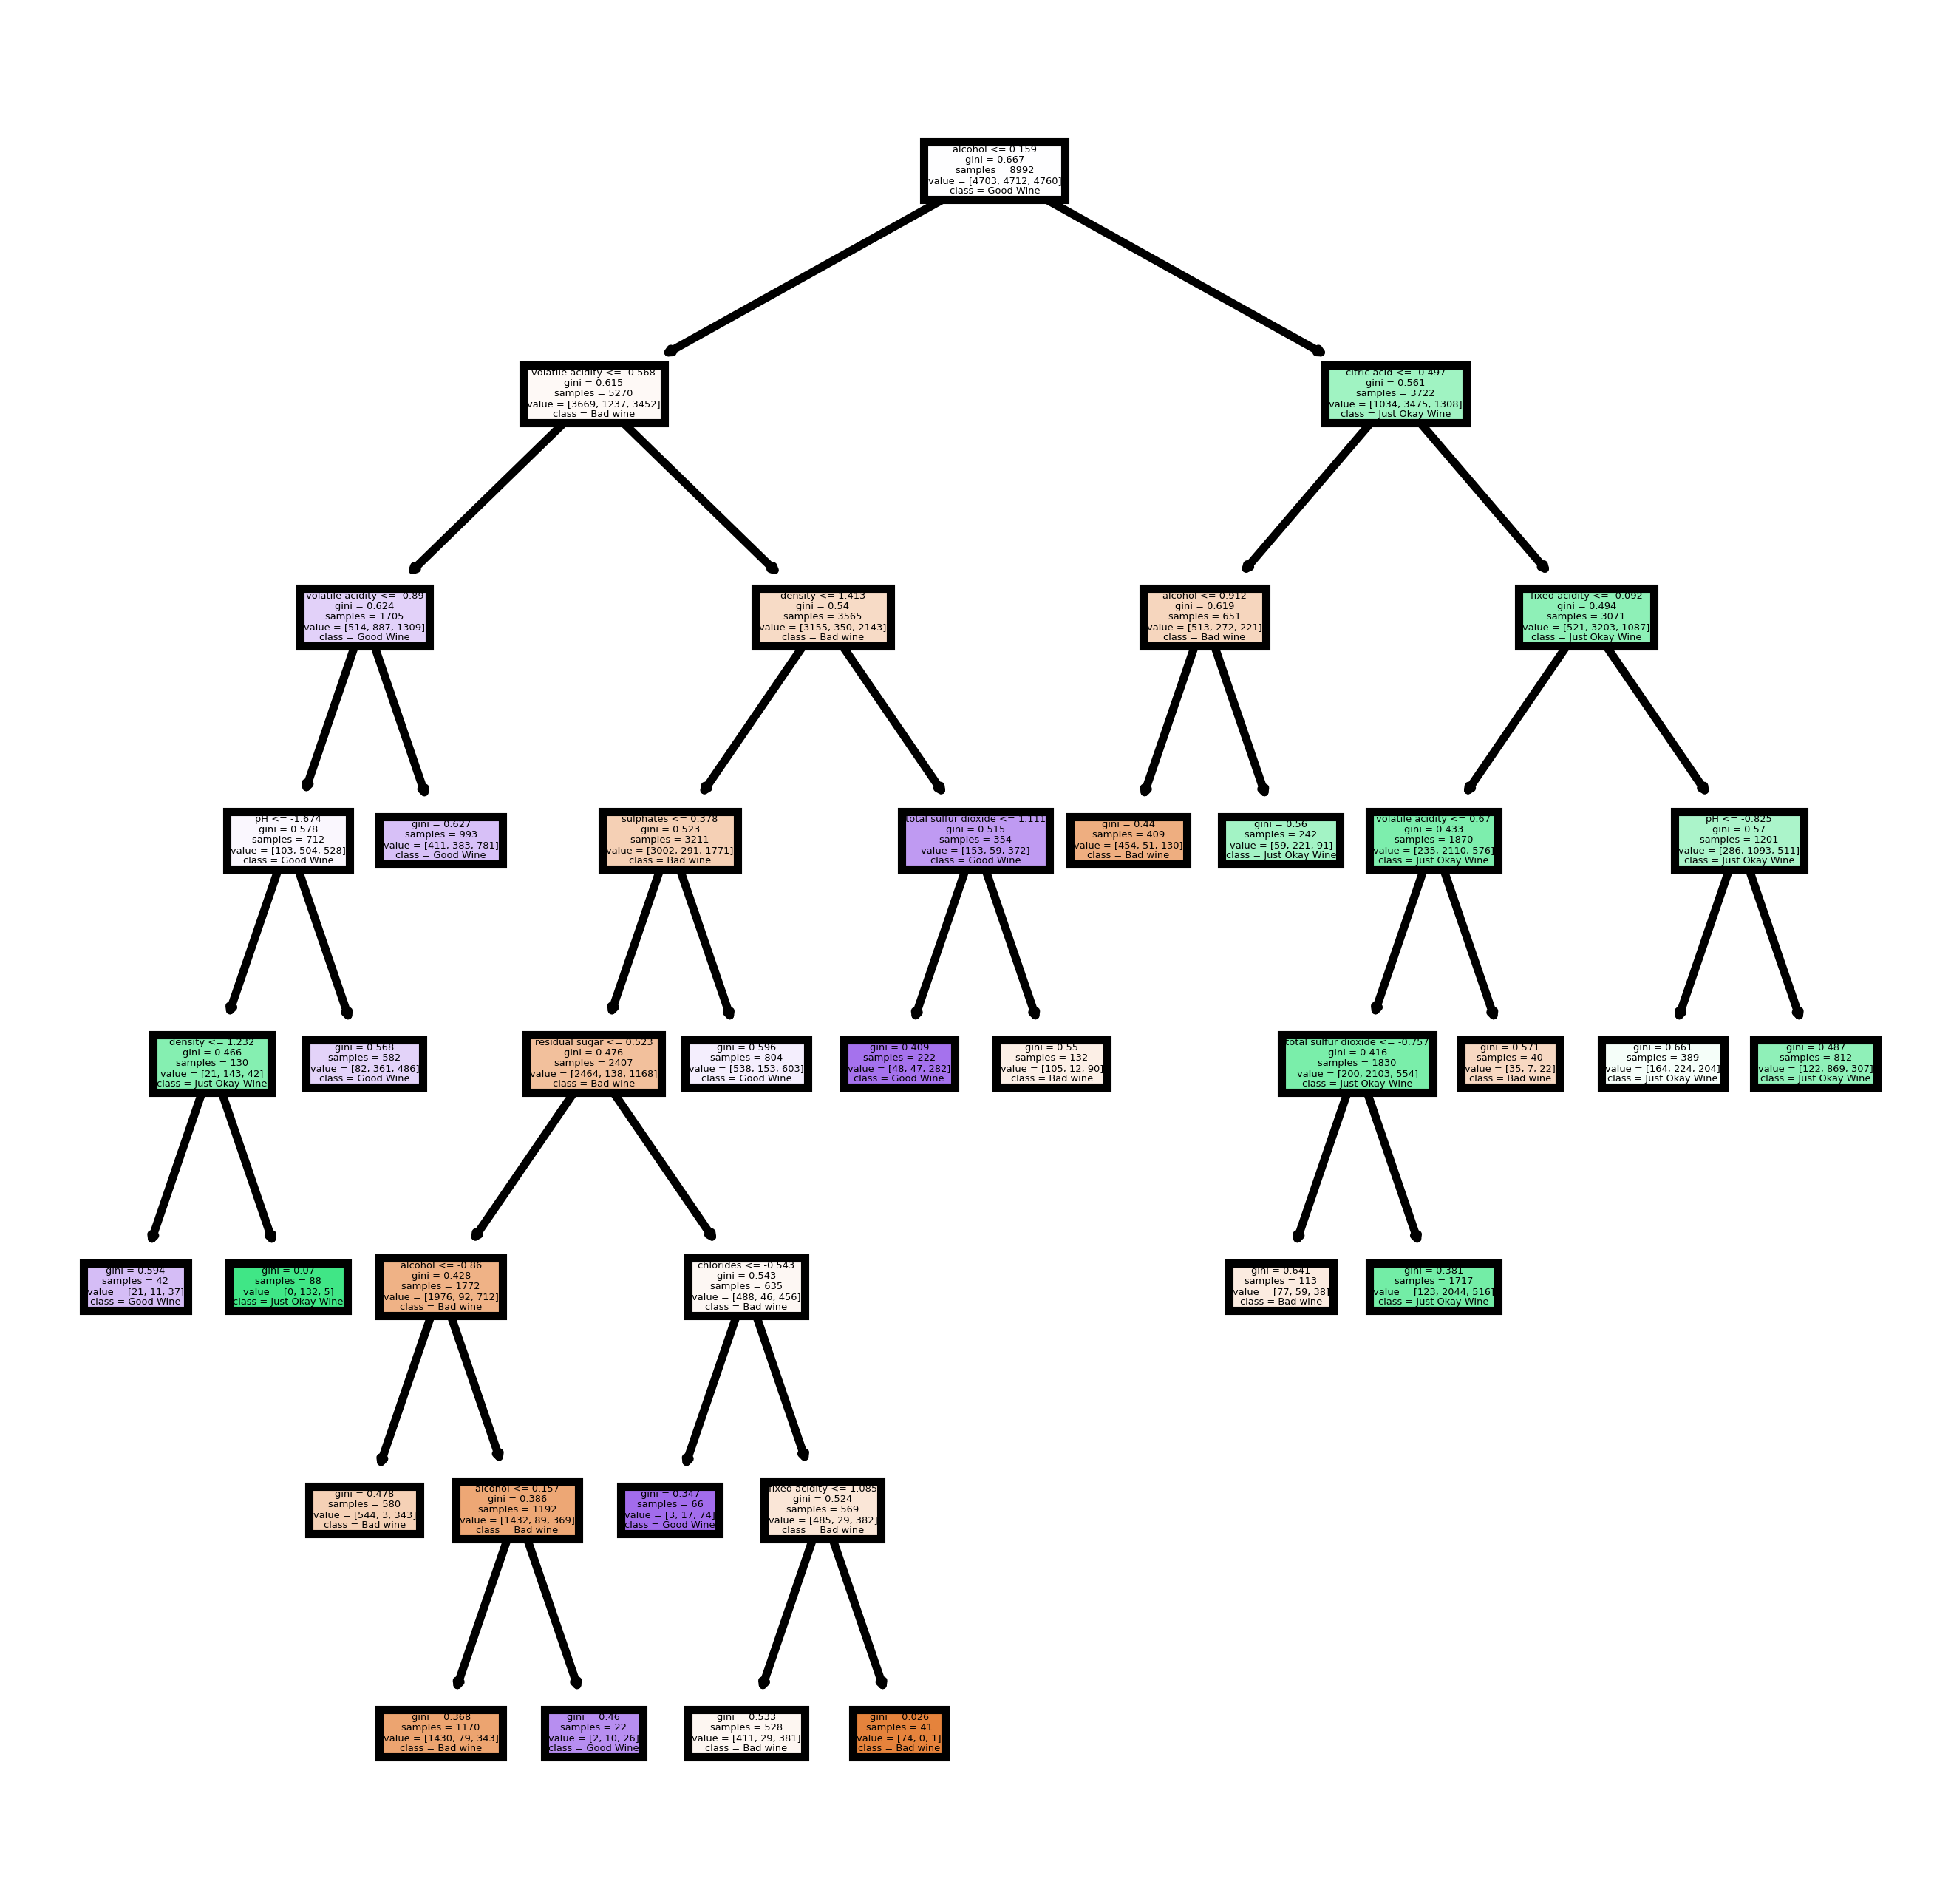

In [20]:
estimator_RFSMOTE = RandomForestClassifier(max_leaf_nodes=20, random_state = 10152020)
estimator_RFSMOTE= estimator_RFSMOTE.fit(X_train_scaled_SMOTE, y_resampled_SMOTE)
#Used https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html to identify how to use
#I got the following from https://stackoverflow.com/questions/40155128/plot-trees-for-a-random-forest-in-python-with-scikit-learn

fn=varlist
cn=['Bad wine', 'Just Okay Wine', 'Good Wine']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(estimator_RFSMOTE.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
#fig.savefig('rf_individualtree.png')

print('Accuracy of Random Forest classifier on training set resampled with SMOTE methods: {:.2f}'
     .format(estimator_RFSMOTE.score(X_train, y_train)))

Accuracy of Random Forest classifier on training set resampled with SMOTE methods: 0.20


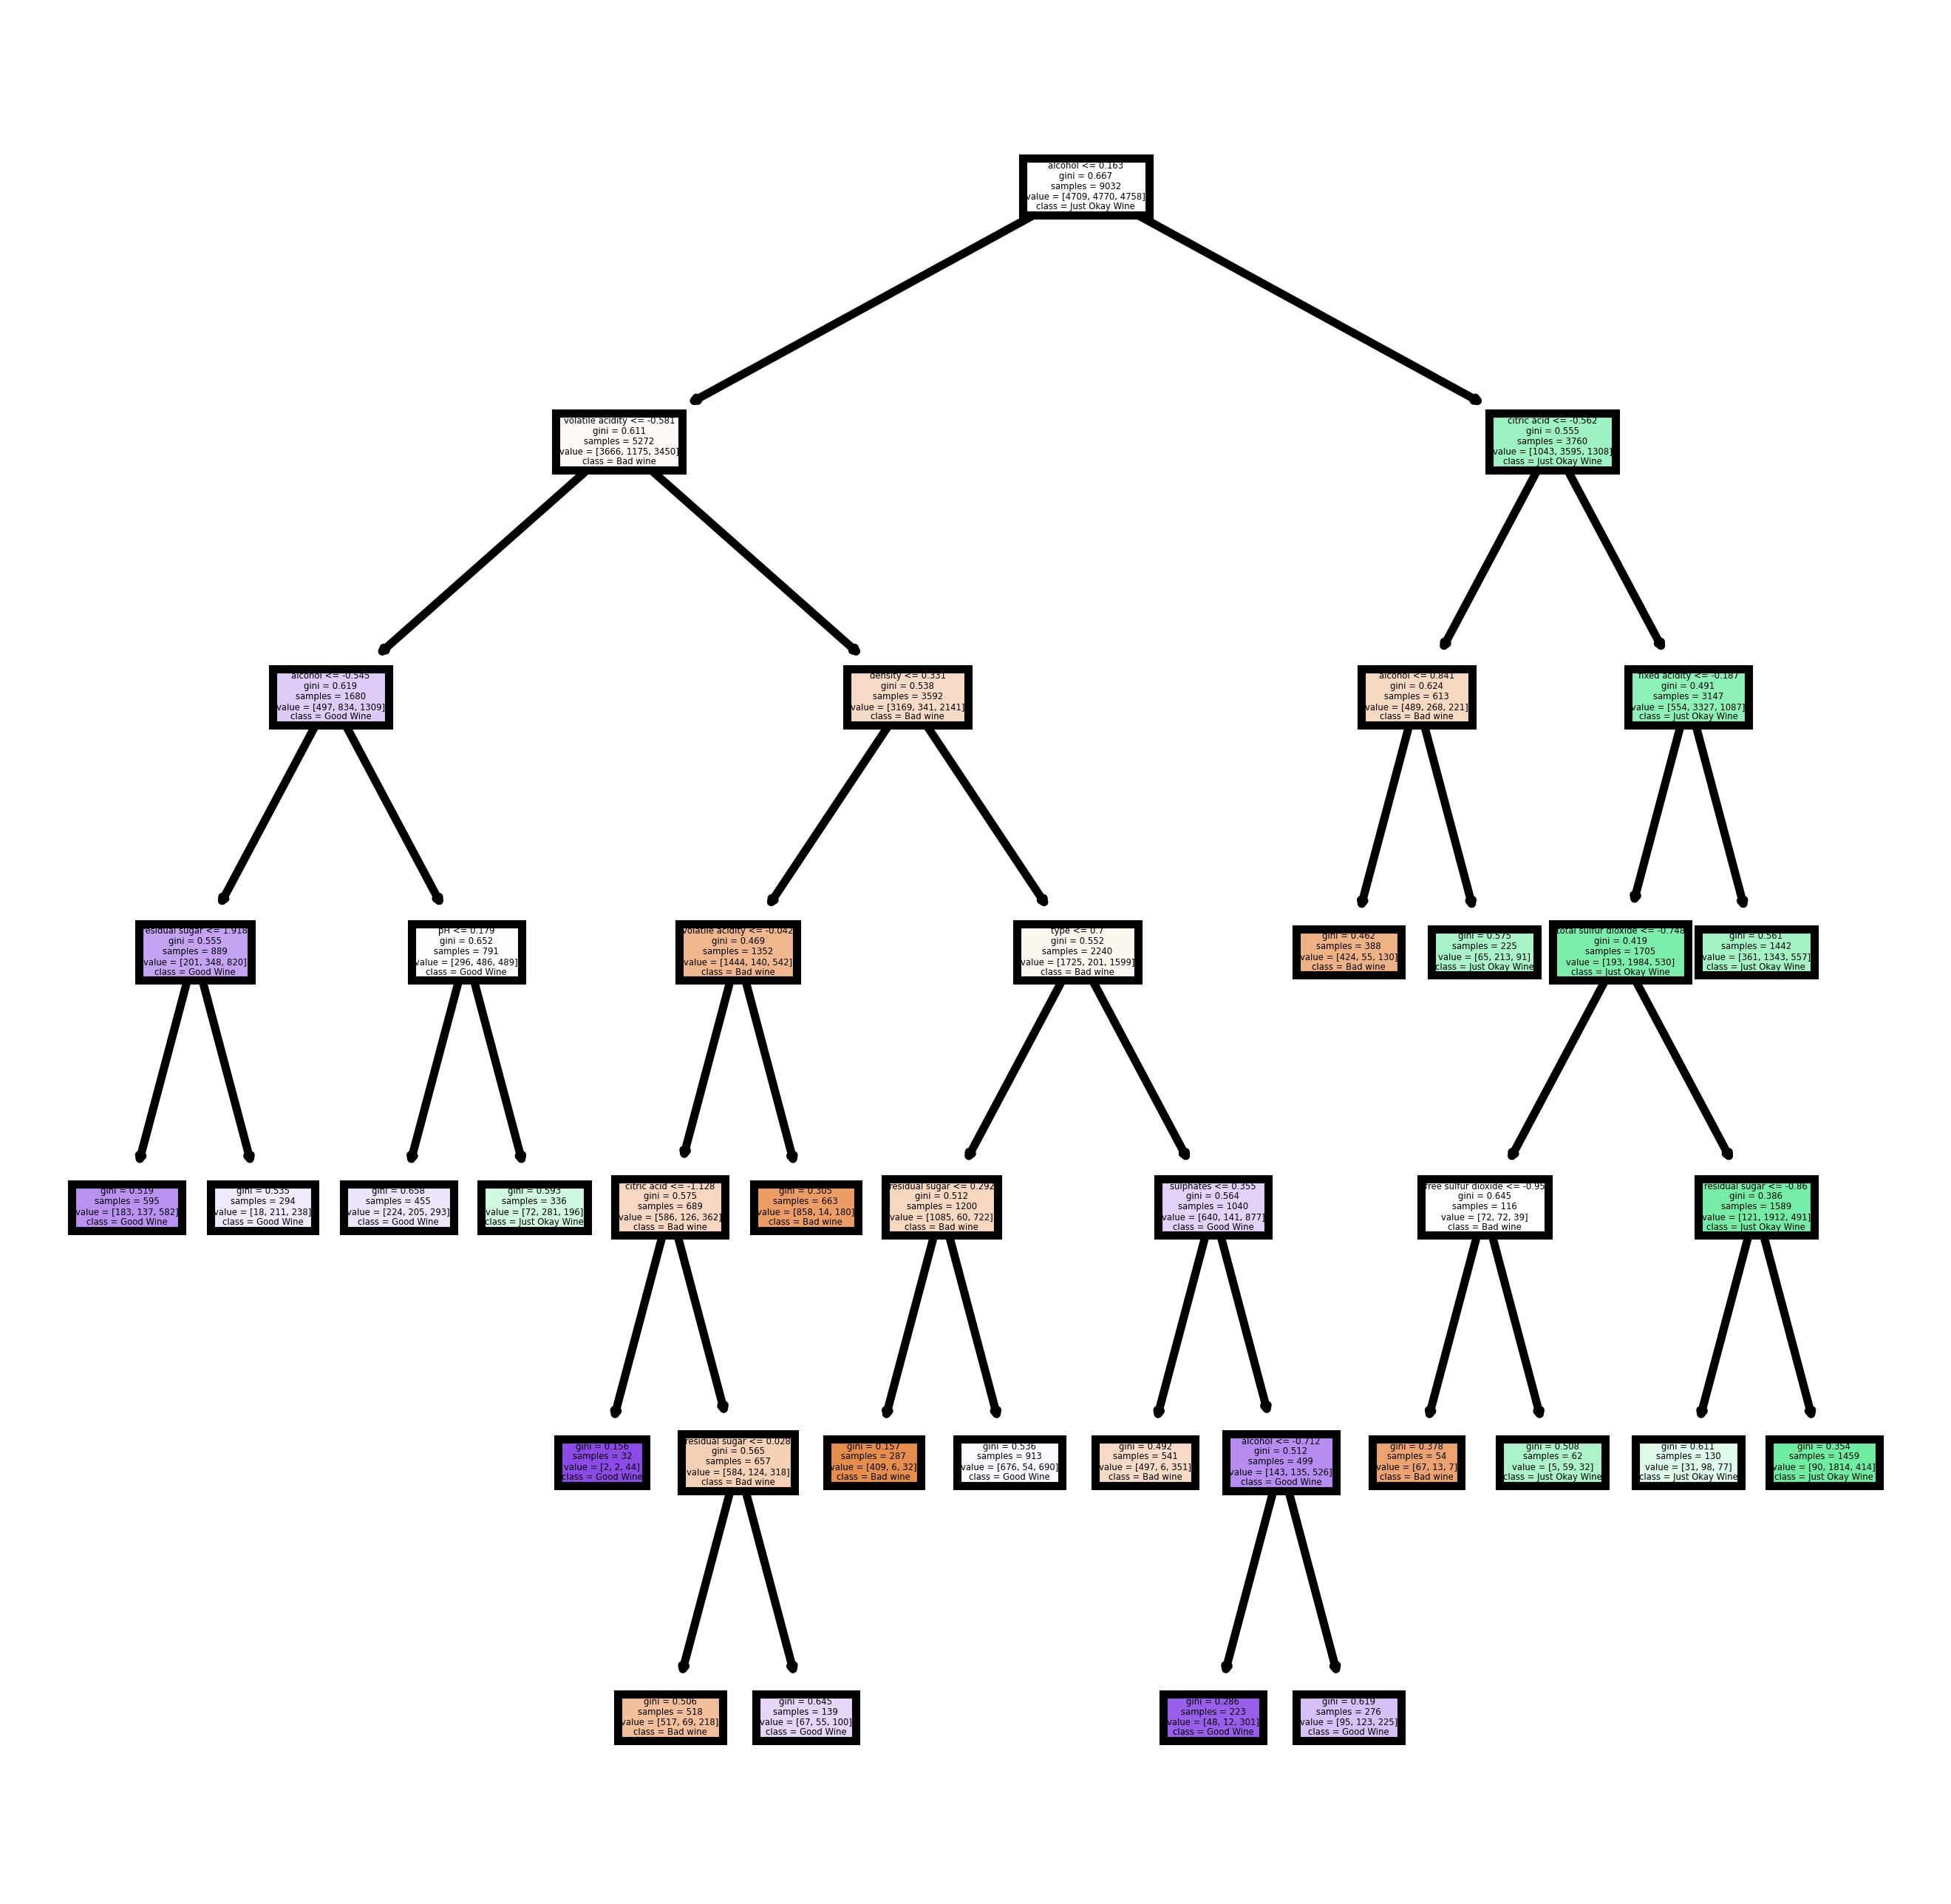

In [21]:
estimator_RFADASYN = RandomForestClassifier(max_leaf_nodes=20, random_state = 10152020)
estimator_RFADASYN= estimator_RFADASYN.fit(X_train_scaled_ADASYN, y_resampled_ADASYN)

#I got the following from https://stackoverflow.com/questions/40155128/plot-trees-for-a-random-forest-in-python-with-scikit-learn

fn=varlist
cn=['Bad wine', 'Just Okay Wine', 'Good Wine']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(estimator_RFADASYN.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
#fig.savefig('rf_individualtree.png')

print('Accuracy of Random Forest classifier on training set resampled with SMOTE methods: {:.2f}'
     .format(estimator_RFADASYN.score(X_train, y_train)))

Both the decision tree and random forest models only had about 20% accuracy. Upon reflection, it looks like the feature scaling is not necessary for these models, so I will rerun with unscaled data:

Accuracy of Decision Tree classifier on training set resampled with SMOTE methods: 0.62


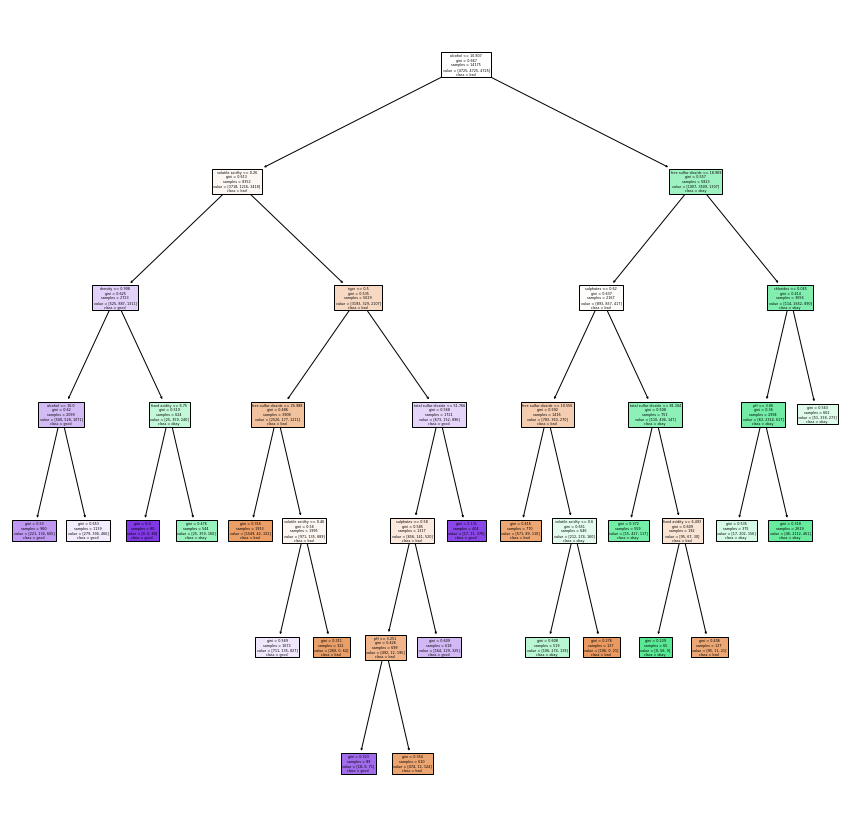

In [22]:
estimator_DTSMOTE = tree.DecisionTreeClassifier(max_leaf_nodes = 20, random_state =  10152020)
estimator_DTSMOTE = estimator_DTSMOTE.fit(X_resampled_SMOTE, y_resampled_SMOTE)

fig = plt.figure(figsize= (15,15))
_ = tree.plot_tree(estimator_DTSMOTE, 
                   feature_names= varlist,
                   class_names = ['bad', 'okay', 'good'],
                    filled=True)

print('Accuracy of Decision Tree classifier on training set resampled with SMOTE methods: {:.2f}'
     .format(estimator_DTSMOTE.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set resampled with ADASYN methods: 0.62


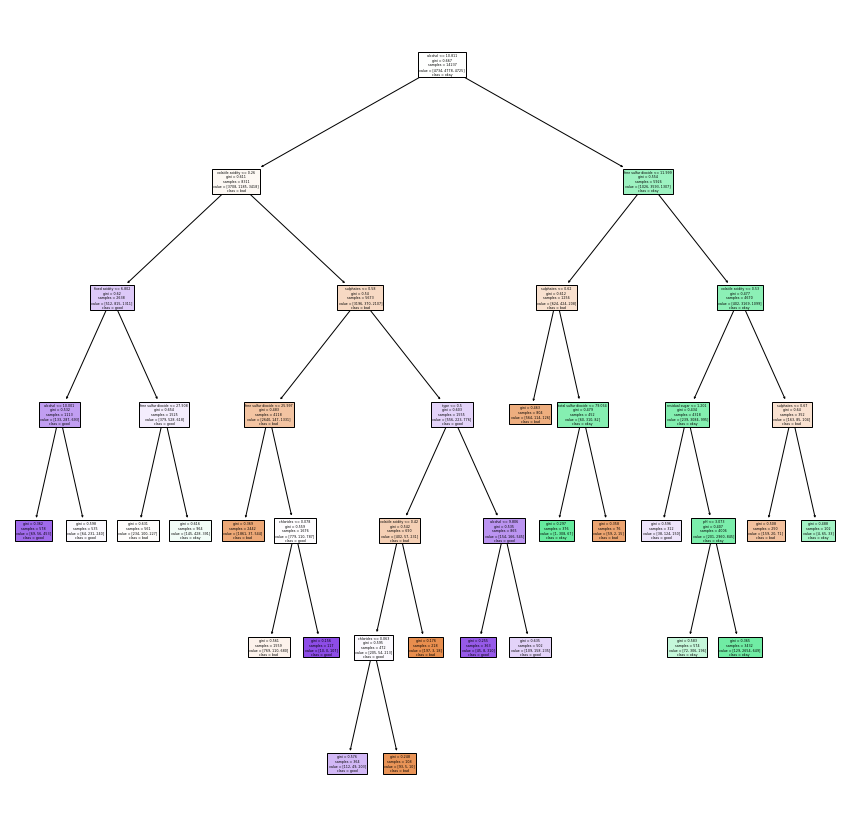

In [23]:
estimator_DTADASYN = tree.DecisionTreeClassifier(max_leaf_nodes = 20, random_state =  10152020)
estimator_DTADASYN = estimator_DTADASYN.fit(X_resampled_ADASYN, y_resampled_ADASYN)

fig = plt.figure(figsize= (15,15))
_ = tree.plot_tree(estimator_DTADASYN, 
                   feature_names= varlist,
                   class_names = ['bad', 'okay', 'good'],
                    filled=True)

print('Accuracy of Decision Tree classifier on training set resampled with ADASYN methods: {:.2f}'
     .format(estimator_DTSMOTE.score(X_train, y_train)))

Accuracy of Random Forest classifier on training set resampled with SMOTE methods: 0.60


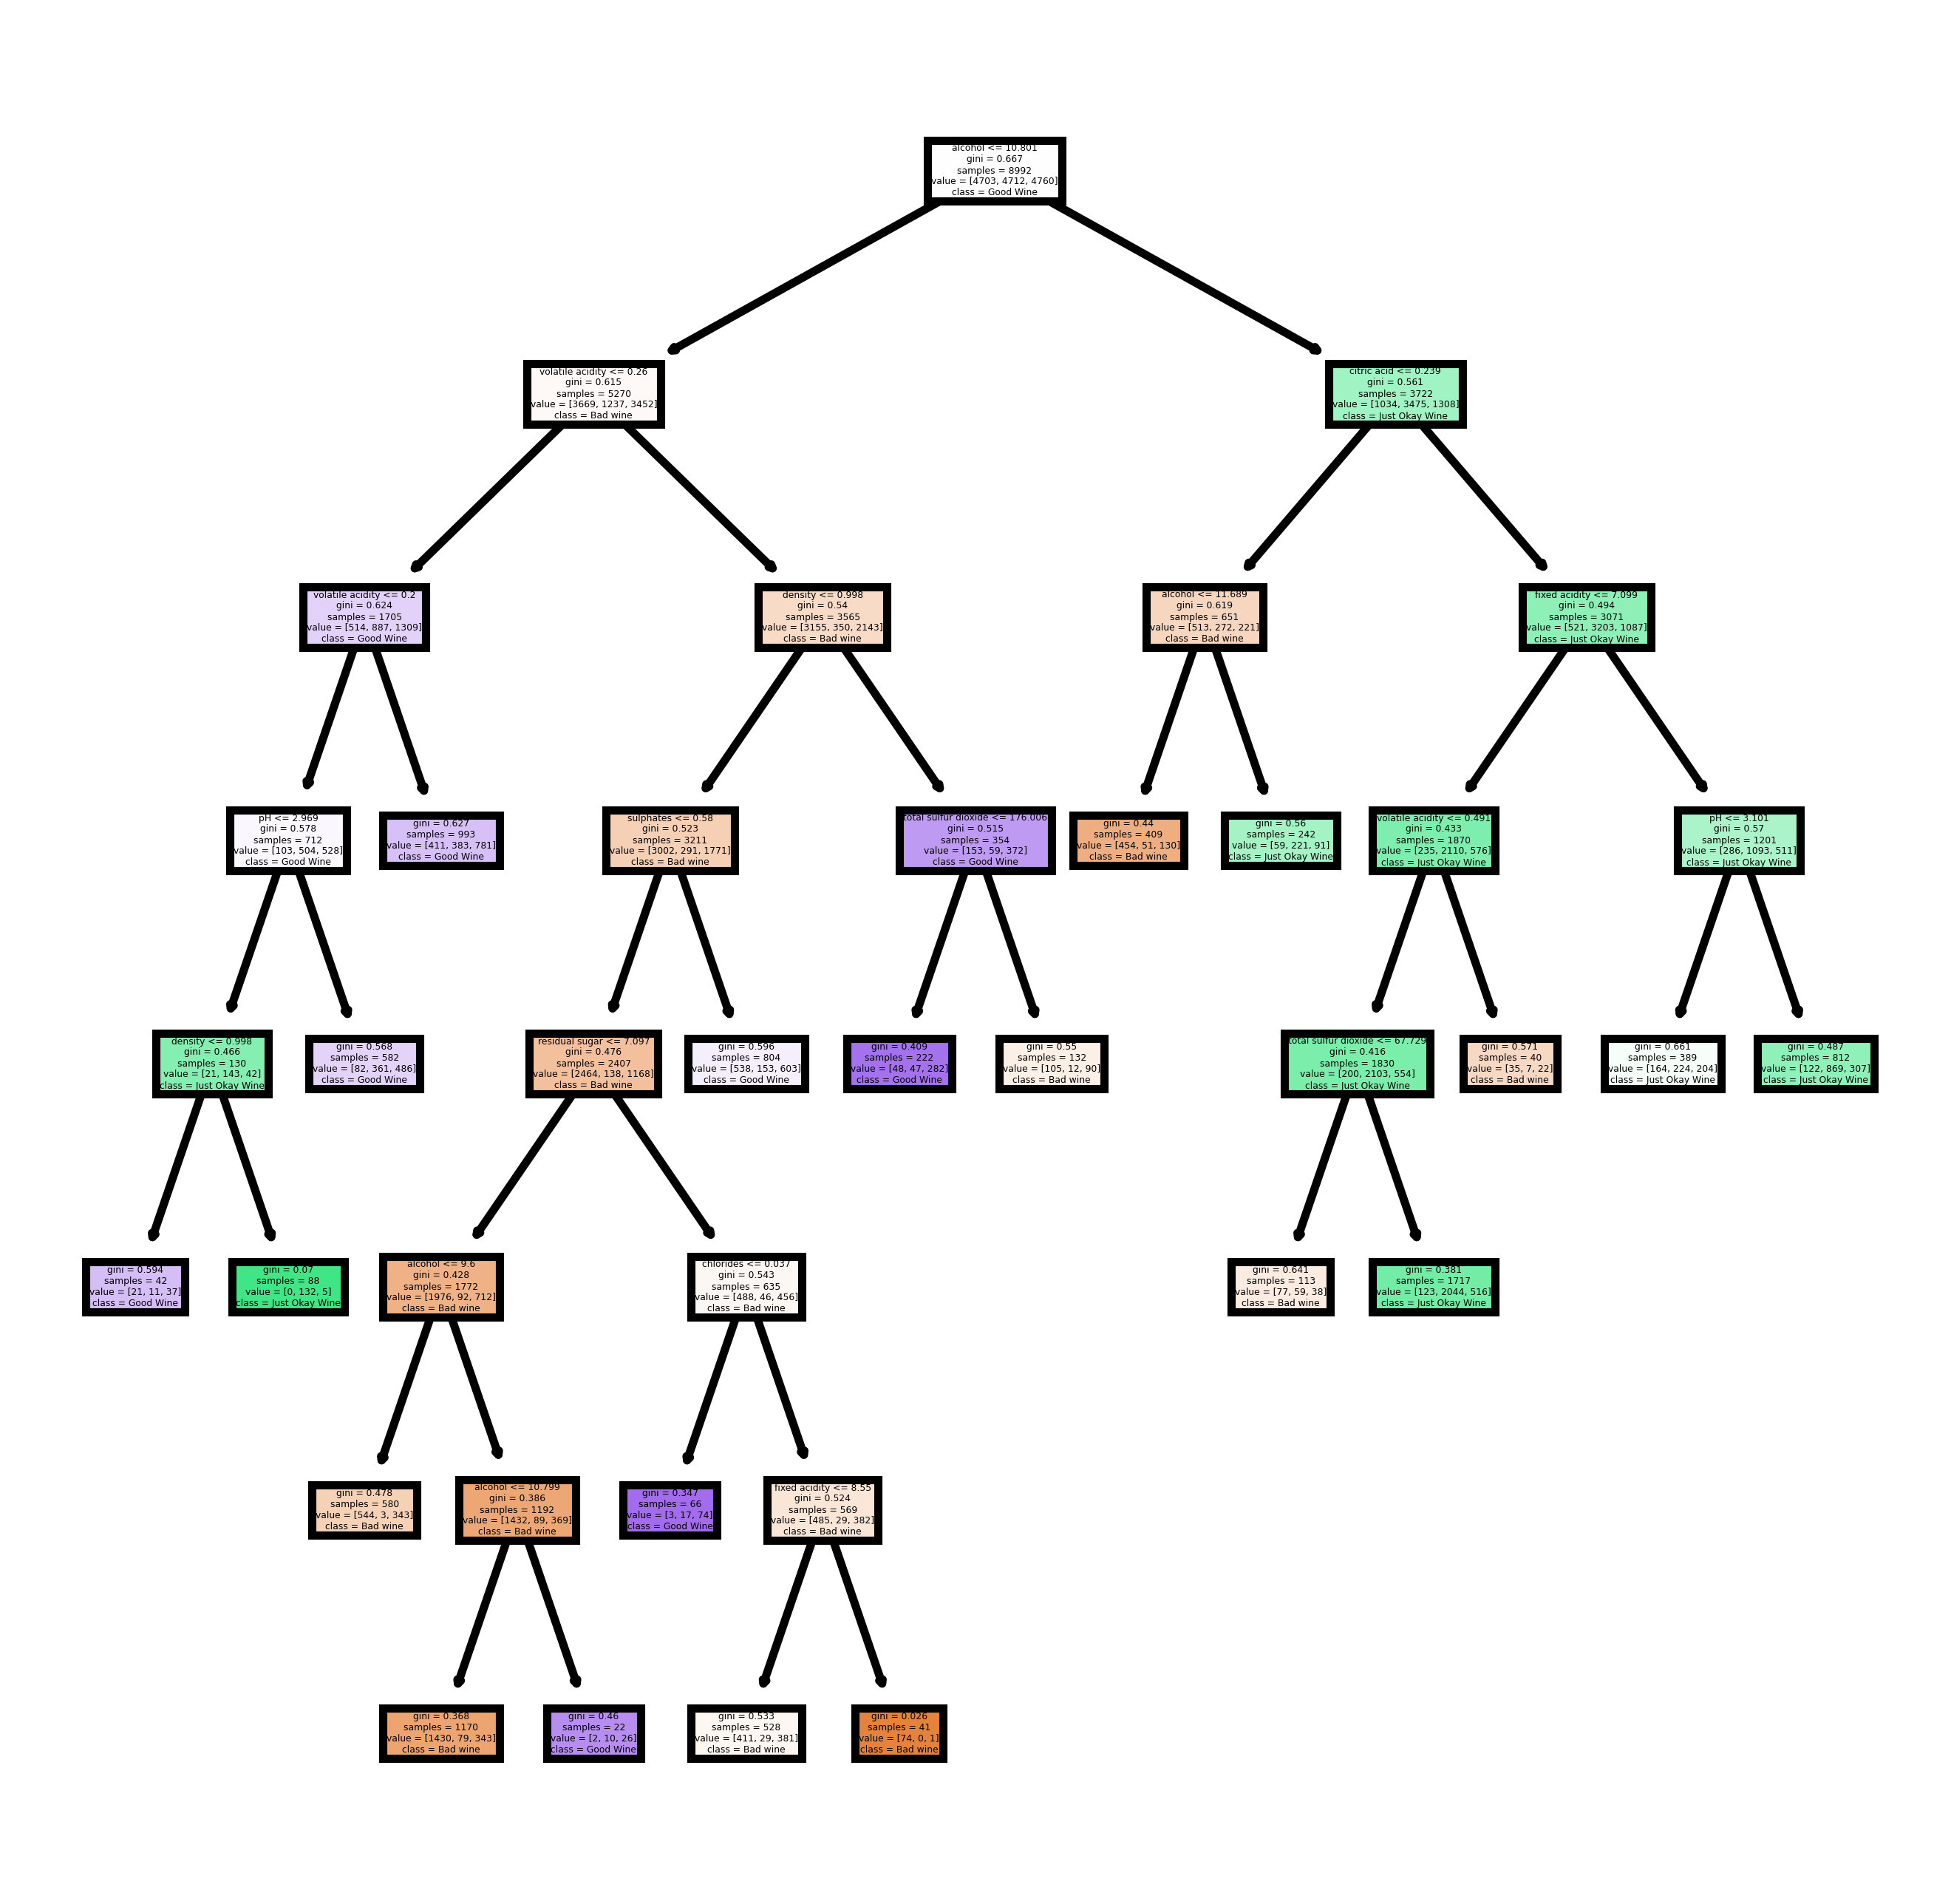

In [24]:
estimator_RFSMOTE = RandomForestClassifier(max_leaf_nodes=20, random_state = 10152020)
estimator_RFSMOTE= estimator_RFSMOTE.fit(X_resampled_SMOTE, y_resampled_SMOTE)
#Used https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html to identify how to use
#I got the following from https://stackoverflow.com/questions/40155128/plot-trees-for-a-random-forest-in-python-with-scikit-learn

fn=varlist
cn=['Bad wine', 'Just Okay Wine', 'Good Wine']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(estimator_RFSMOTE.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
#fig.savefig('rf_individualtree.png')

print('Accuracy of Random Forest classifier on training set resampled with SMOTE methods: {:.2f}'
     .format(estimator_RFSMOTE.score(X_train, y_train)))

Accuracy of Random Forest classifier on training set resampled with SMOTE methods: 0.59


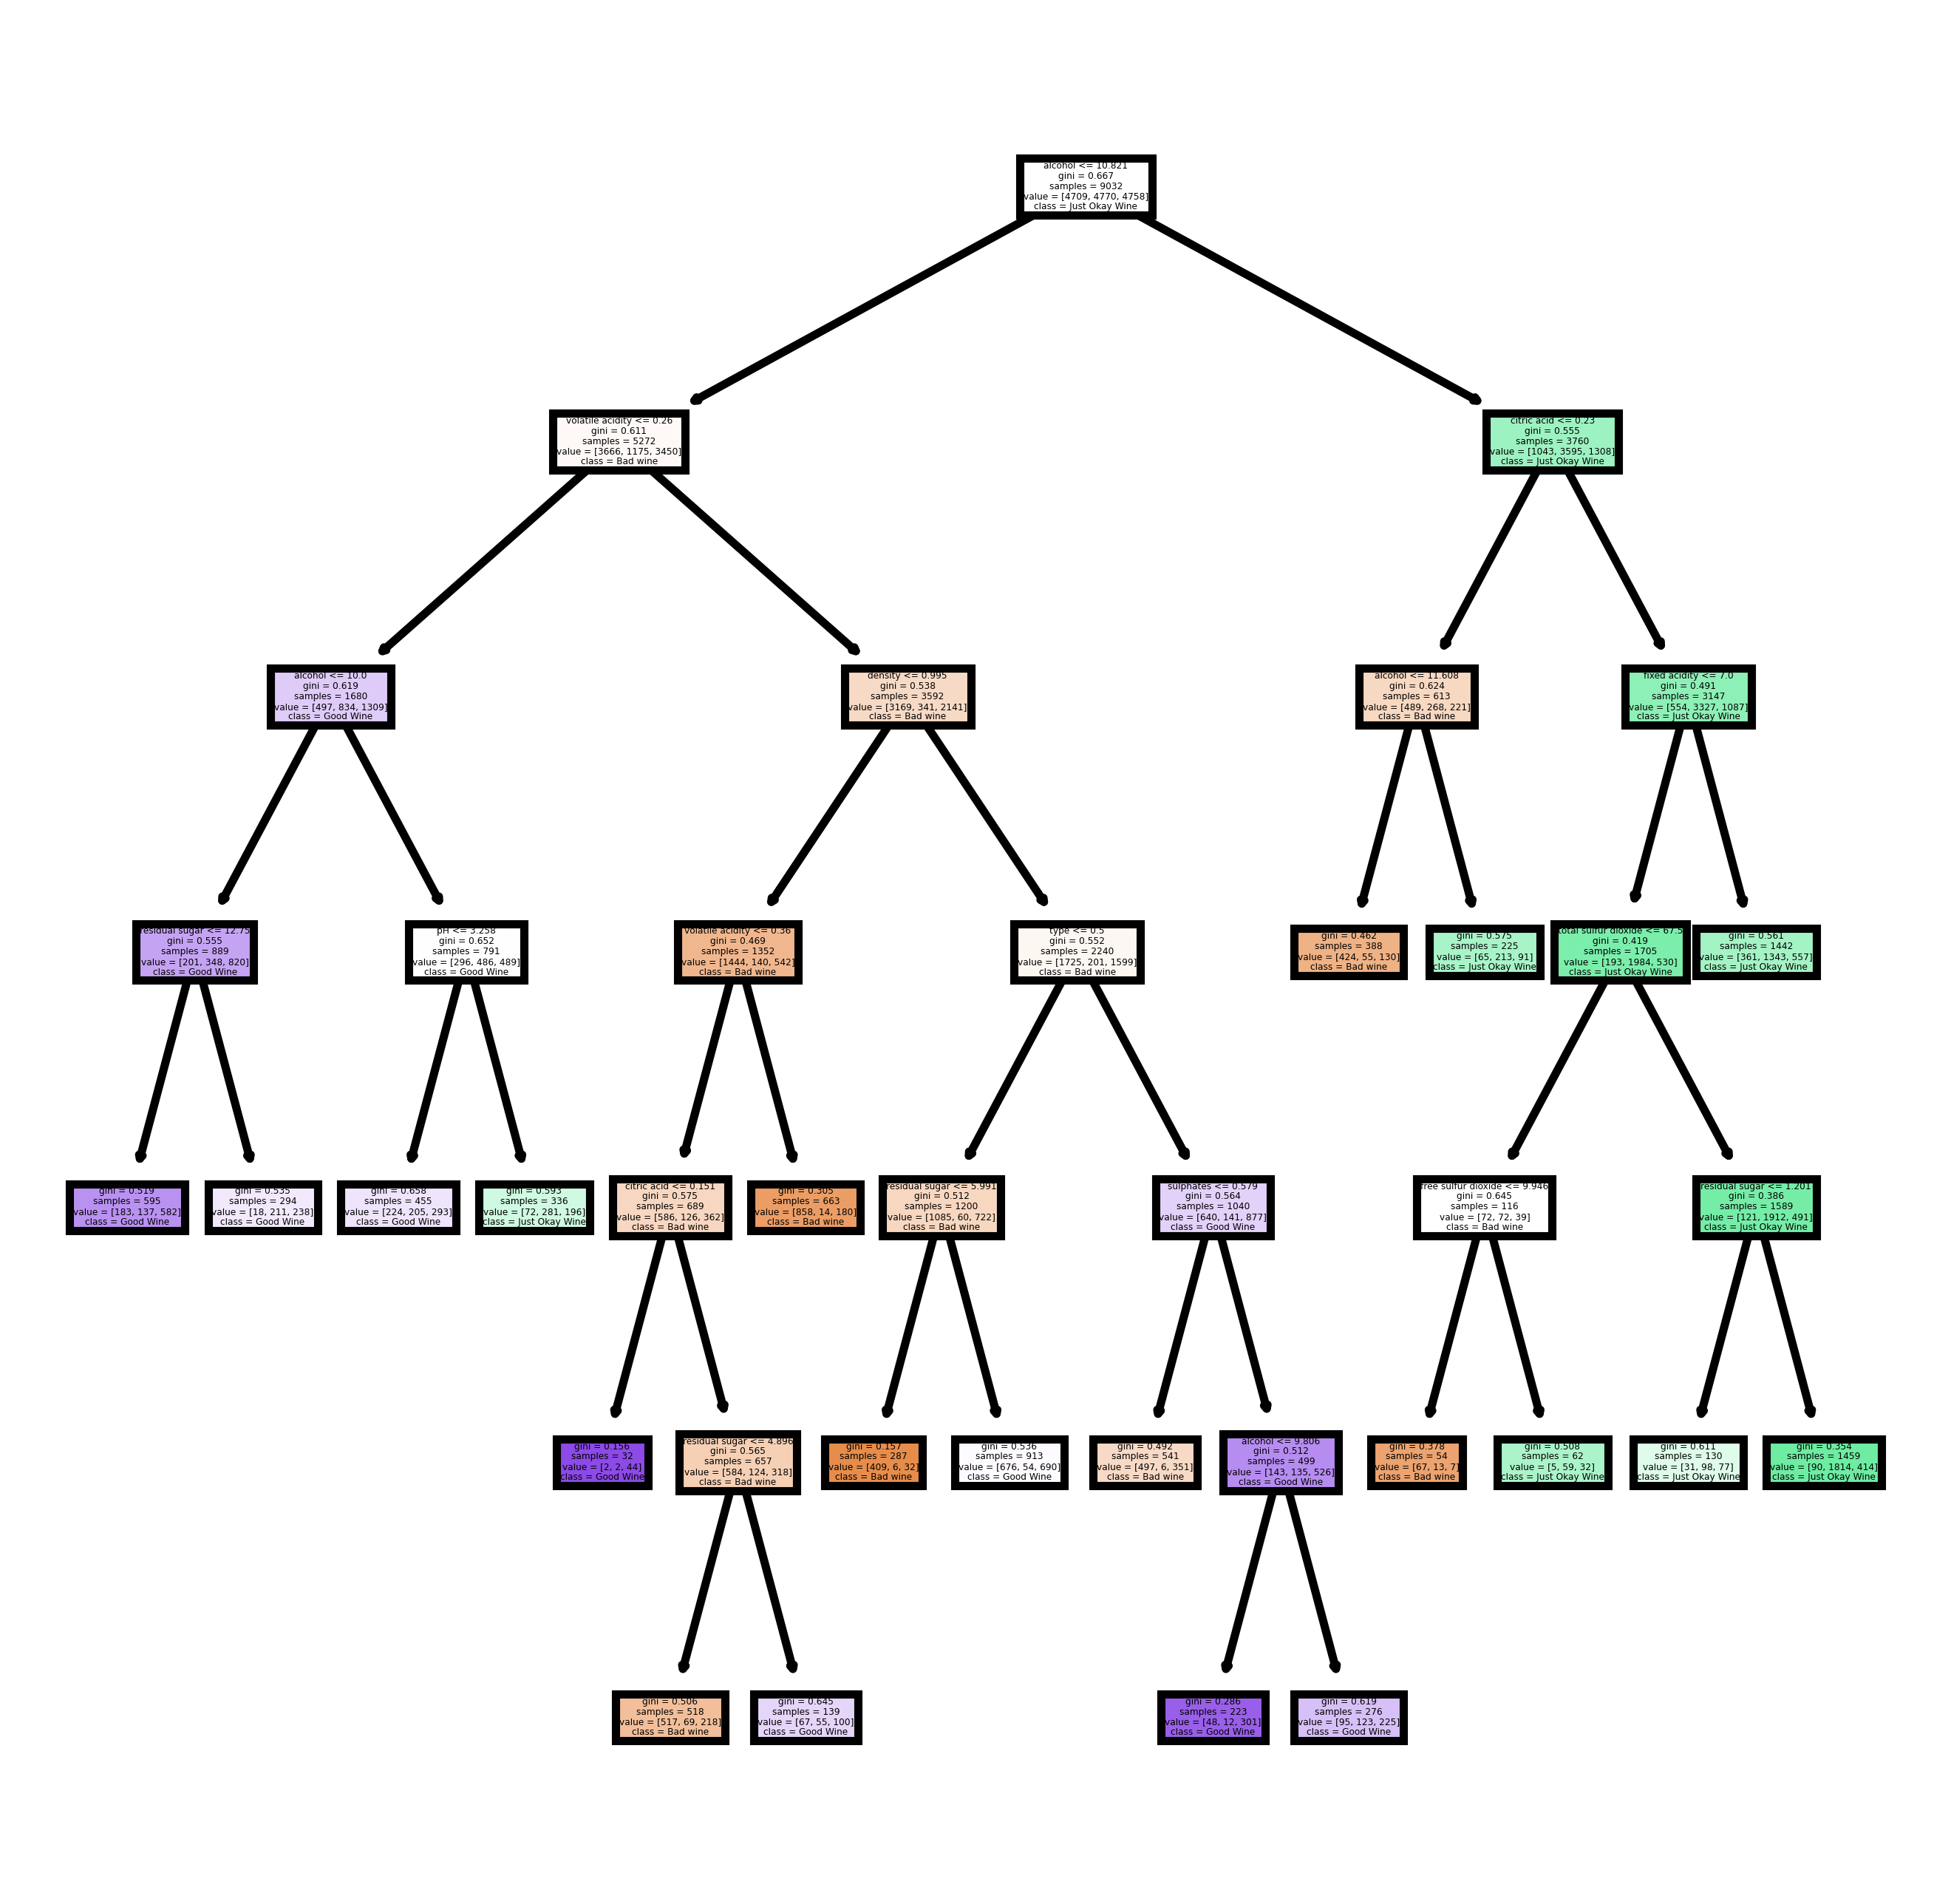

In [25]:
estimator_RFADASYN = RandomForestClassifier(max_leaf_nodes=20, random_state = 10152020)
estimator_RFADASYN= estimator_RFADASYN.fit(X_resampled_ADASYN, y_resampled_ADASYN)

#I got the following from https://stackoverflow.com/questions/40155128/plot-trees-for-a-random-forest-in-python-with-scikit-learn

fn=varlist
cn=['Bad wine', 'Just Okay Wine', 'Good Wine']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(estimator_RFADASYN.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
#fig.savefig('rf_individualtree.png')

print('Accuracy of Random Forest classifier on training set resampled with SMOTE methods: {:.2f}'
     .format(estimator_RFADASYN.score(X_train, y_train)))

For the sake of comparison, the following prints out the accuracy score for each model on the training set.

In [26]:
#RESULTS:
print('Accuracy of Logistic regression classifier on training set resampled with SMOTE: {:.2f}'
     .format(logreg_SMOTE.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on training set resampled with ADASYN methods: {:.2f}'
     .format(logreg_ADASYN.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on training set resampled with SMOTE methods: {:.2f}'
     .format(estimator_DTSMOTE.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on training set resampled with ADASYN methods: {:.2f}'
     .format(estimator_DTADASYN.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on training set resampled with SMOTE methods: {:.2f}'
     .format(estimator_RFSMOTE.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on training set resampled with ADASYN methods: {:.2f}'
     .format(estimator_RFADASYN.score(X_train, y_train)))

Accuracy of Logistic regression classifier on training set resampled with SMOTE: 0.57
Accuracy of Logistic regression classifier on training set resampled with ADASYN methods: 0.60
Accuracy of Decision Tree Classifier on training set resampled with SMOTE methods: 0.62
Accuracy of Decision Tree Classifier on training set resampled with ADASYN methods: 0.45
Accuracy of Random Forest classifier on training set resampled with SMOTE methods: 0.60
Accuracy of Random Forest classifier on training set resampled with ADASYN methods: 0.59


The Logistic regression classifier with the ADASYN resampling methos have the highest accuracy by a small margin. Before I move forward with this model for tuning, I will examine the crossvalidation and confusion matrix results to see which model has the highest accuracy with CV and accross all categories

In [27]:
LR_ADASYN_CV = cross_validate(estimator = logreg_ADASYN, 
                             X=X_train,
                             y=y_train,
                             cv =5, 
                             return_train_score= True,
                             return_estimator= True )

In [28]:
print(LR_ADASYN_CV['train_score'], LR_ADASYN_CV['test_score'])
print(LR_ADASYN_CV['train_score'].mean(), LR_ADASYN_CV['test_score'].mean())

[0.78002836 0.77921815 0.78392062 0.77885784 0.78513568] [0.78218623 0.78947368 0.76742301 0.78606159 0.77147488]
0.7814321282505458 0.7793238800779532


In [29]:
LR_SMOTE_CV = cross_validate(estimator = logreg_SMOTE, 
                             X=X_train,
                             y=y_train,
                             cv =5, 
                             return_train_score= True,
                             return_estimator= True )

In [30]:
print(LR_SMOTE_CV['train_score'], LR_SMOTE_CV['test_score'])
print(LR_SMOTE_CV['train_score'].mean(), LR_SMOTE_CV['test_score'].mean())

[0.78002836 0.77921815 0.78392062 0.77885784 0.78513568] [0.78218623 0.78947368 0.76742301 0.78606159 0.77147488]
0.7814321282505458 0.7793238800779532


In [31]:
DT_SMOTE_CV = cross_validate(estimator = estimator_DTSMOTE, 
                             X=X_train,
                             y=y_train,
                             cv =5, 
                             return_train_score= True,
                             return_estimator= True )

In [32]:
print(DT_SMOTE_CV['train_score'], DT_SMOTE_CV['test_score'])
print(DT_SMOTE_CV['train_score'].mean(), DT_SMOTE_CV['test_score'].mean())

[0.80636014 0.80514482 0.799919   0.8072094  0.80315917] [0.78785425 0.79919028 0.77633712 0.78525122 0.76904376]
0.8043585056687942 0.7835353250349412


In [33]:
DT_ADASYN_CV = cross_validate(estimator = estimator_DTADASYN, 
                             X=X_train,
                             y=y_train,
                             cv =5, 
                             return_train_score= True,
                             return_estimator= True )

In [34]:
print(DT_ADASYN_CV['train_score'], DT_ADASYN_CV['test_score'])
print(DT_ADASYN_CV['train_score'].mean(), DT_ADASYN_CV['test_score'].mean())

[0.80636014 0.80514482 0.799919   0.8072094  0.80315917] [0.78785425 0.79919028 0.77633712 0.78525122 0.76904376]
0.8043585056687942 0.7835353250349412


In [35]:
RF_SMOTE_CV = cross_validate(estimator = estimator_RFSMOTE, 
                             X=X_train,
                             y=y_train,
                             cv =5, 
                             return_train_score= True,
                             return_estimator= True )

In [36]:
print(RF_SMOTE_CV['train_score'], RF_SMOTE_CV['test_score'])
print(RF_SMOTE_CV['train_score'].mean(), RF_SMOTE_CV['test_score'].mean())

[0.807778   0.81041118 0.81308222 0.80984204 0.81530984] [0.79190283 0.79595142 0.79983793 0.80551053 0.78687196]
0.811284657318093 0.7960149344811974


In [37]:
RF_ADASYN_CV = cross_validate(estimator = estimator_RFADASYN, 
                             X=X_train,
                             y=y_train,
                             cv =5, 
                             return_train_score= True,
                             return_estimator= True )

In [38]:
print(RF_ADASYN_CV['train_score'], RF_ADASYN_CV['test_score'])
print(RF_ADASYN_CV['train_score'].mean(), RF_ADASYN_CV['test_score'].mean())

[0.807778   0.81041118 0.81308222 0.80984204 0.81530984] [0.79190283 0.79595142 0.79983793 0.80551053 0.78687196]
0.811284657318093 0.7960149344811974


#### Based on the above results, the random forest model produced the highest accuracy predictions. I will look at the confusion matrix next to understand where errors are happening.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       234
           1       0.18      0.26      0.22      1213
           2       0.76      0.71      0.74      4725

    accuracy                           0.60      6172
   macro avg       0.31      0.32      0.32      6172
weighted avg       0.62      0.60      0.61      6172

[[   0   76  158]
 [   0  321  892]
 [   0 1369 3356]]


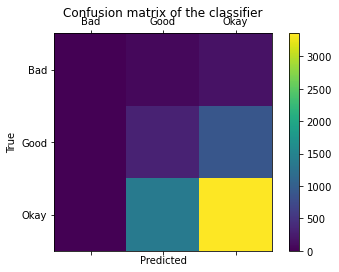

In [39]:
pred = logreg_ADASYN.predict(X_train)
print(classification_report(y_train, pred, zero_division = 0))

#The following code came from https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels, which I found while looking for a better 
#way to visualize a confusion matrix
cm = confusion_matrix(y_train, pred)
print(cm)
labels = ['Bad','Good', 'Okay']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       234
           1       0.20      0.35      0.25      1213
           2       0.77      0.65      0.71      4725

    accuracy                           0.57      6172
   macro avg       0.32      0.33      0.32      6172
weighted avg       0.63      0.57      0.59      6172

[[   0   87  147]
 [   0  421  792]
 [   0 1641 3084]]


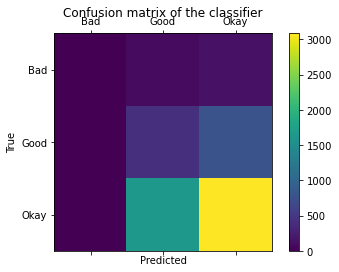

In [40]:
pred = logreg_SMOTE.predict(X_train)
print(classification_report(y_train, pred, zero_division = 0))

#The following code came from https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels, which I found while looking for a better 
#way to visualize a confusion matrix
cm = confusion_matrix(y_train, pred)
print(cm)
labels = ['Bad','Good', 'Okay']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

              precision    recall  f1-score   support

           0       0.16      0.58      0.25       234
           1       0.41      0.76      0.53      1213
           2       0.89      0.58      0.71      4725

    accuracy                           0.62      6172
   macro avg       0.49      0.64      0.50      6172
weighted avg       0.77      0.62      0.65      6172

[[ 135   24   75]
 [  41  924  248]
 [ 660 1315 2750]]


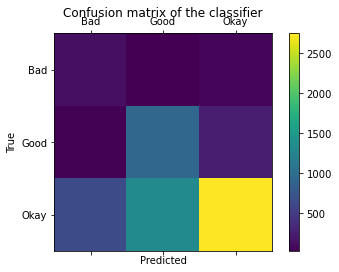

In [41]:
pred = estimator_DTSMOTE.predict(X_train)
print(classification_report(y_train, pred, zero_division = 0))

#The following code came from https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels, which I found while looking for a better 
#way to visualize a confusion matrix
cm = confusion_matrix(y_train, pred)
print(cm)
labels = ['Bad','Good', 'Okay']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

              precision    recall  f1-score   support

           0       0.09      0.79      0.17       234
           1       0.40      0.75      0.52      1213
           2       0.88      0.36      0.51      4725

    accuracy                           0.45      6172
   macro avg       0.46      0.63      0.40      6172
weighted avg       0.76      0.45      0.50      6172

[[ 185   22   27]
 [ 103  913  197]
 [1691 1336 1698]]


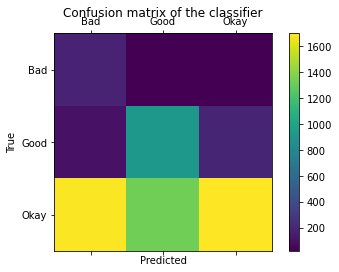

In [42]:
pred = estimator_DTADASYN.predict(X_train)
print(classification_report(y_train, pred, zero_division = 0))

#The following code came from https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels, which I found while looking for a better 
#way to visualize a confusion matrix
cm = confusion_matrix(y_train, pred)
print(cm)
labels = ['Bad','Good', 'Okay']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

              precision    recall  f1-score   support

           0       0.16      0.74      0.26       234
           1       0.43      0.78      0.56      1213
           2       0.90      0.55      0.69      4725

    accuracy                           0.60      6172
   macro avg       0.50      0.69      0.50      6172
weighted avg       0.78      0.60      0.65      6172

[[ 172   13   49]
 [  40  942  231]
 [ 887 1219 2619]]


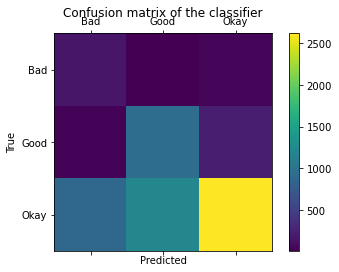

In [43]:
pred = estimator_RFSMOTE.predict(X_train)
print(classification_report(y_train, pred, zero_division = 0))

#The following code came from https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels, which I found while looking for a better 
#way to visualize a confusion matrix
cm = confusion_matrix(y_train, pred)
print(cm)
labels = ['Bad','Good', 'Okay']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

              precision    recall  f1-score   support

           0       0.15      0.75      0.26       234
           1       0.41      0.75      0.53      1213
           2       0.89      0.54      0.67      4725

    accuracy                           0.59      6172
   macro avg       0.49      0.68      0.49      6172
weighted avg       0.77      0.59      0.63      6172

[[ 176   16   42]
 [  35  905  273]
 [ 932 1260 2533]]


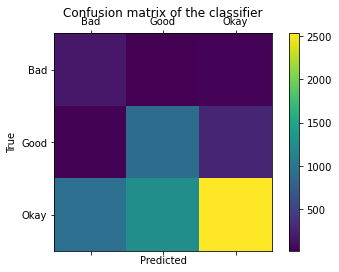

In [44]:
pred = estimator_RFADASYN.predict(X_train)
print(classification_report(y_train, pred, zero_division = 0))

#The following code came from https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels, which I found while looking for a better 
#way to visualize a confusion matrix
cm = confusion_matrix(y_train, pred)
print(cm)
labels = ['Bad','Good', 'Okay']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Based on the distribution of errors (Logistic regression models failed to predict any bad wines) and the cross-validation accuracy scores, which showed the highest accuracy for Random forest, I will proceed with fine tuning the random forest model. At this point, I will also continue testing the model with both the SMOTE and ADASYN resampling data as they are very close in terms of results. SMOTE seems a little better, with slightly higher precision than ADASYN at this point

NEXT STEP: Gridsearch with parameters

In [45]:
grid_param = {'n_estimators': [50,100,200],
              'max_features':['sqrt', 'log2', None],
              'max_leaf_nodes': [10,20,30]
             }

In [46]:
estimator = RandomForestClassifier()
clf = GridSearchCV(estimator = estimator, param_grid= grid_param, verbose= 2, cv=5, return_train_score=True)

In [47]:
clf.fit(X_resampled_SMOTE, y_resampled_SMOTE)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] max_features=sqrt, max_leaf_nodes=10, n_estimators=50 ...........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=sqrt, max_leaf_nodes=10, n_estimators=50, total=   0.4s
[CV] max_features=sqrt, max_leaf_nodes=10, n_estimators=50 ...........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_features=sqrt, max_leaf_nodes=10, n_estimators=50, total=   0.4s
[CV] max_features=sqrt, max_leaf_nodes=10, n_estimators=50 ...........
[CV]  max_features=sqrt, max_leaf_nodes=10, n_estimators=50, total=   0.4s
[CV] max_features=sqrt, max_leaf_nodes=10, n_estimators=50 ...........
[CV]  max_features=sqrt, max_leaf_nodes=10, n_estimators=50, total=   0.4s
[CV] max_features=sqrt, max_leaf_nodes=10, n_estimators=50 ...........
[CV]  max_features=sqrt, max_leaf_nodes=10, n_estimators=50, total=   0.4s
[CV] max_features=sqrt, max_leaf_nodes=10, n_estimators=100 ..........
[CV]  max_features=sqrt, max_leaf_nodes=10, n_estimators=100, total=   0.7s
[CV] max_features=sqrt, max_leaf_nodes=10, n_estimators=100 ..........
[CV]  max_features=sqrt, max_leaf_nodes=10, n_estimators=100, total=   0.7s
[CV] max_features=sqrt, max_leaf_nodes=10, n_estimators=100 ..........
[CV]  max_features=sqrt, max_leaf_nodes=10, n_estimators=100, total=   0.7s
[CV] max_features=sqrt, max_leaf_nodes=10, n_e

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  4.0min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, verbose=2)

In [48]:
pd.DataFrame(clf.cv_results_).sort_values('mean_test_score', ascending=False).T

8   \
mean_fit_time                                                   1.85844   
std_fit_time                                                  0.0585163   
mean_score_time                                               0.0472774   
std_score_time                                               0.00185188   
param_max_features                                                 sqrt   
param_max_leaf_nodes                                                 30   
param_n_estimators                                                  200   
params                {'max_features': 'sqrt', 'max_leaf_nodes': 30,...   
split0_test_score                                              0.731217   
split1_test_score                                              0.748854   
split2_test_score                                              0.742152   
split3_test_score                                              0.738624   
split4_test_score                                              0.724162   
mean_test_score                                                0.737002   
std_test_score                                               0.00857832   
rank_test_score                                                       1   
split0_train_score                                             0.753792   
split1_train_score                                             0.744797   
split2_train_score                                             0.742857   
split3_train_score                                             0.744621   
split4_train_score                                             0.746649   
mean_train_score                                               0.746543   
std_train_score                                              0.00381801   

                                                                     7   \
mean_fit_time                                                   0.93629   
std_fit_time                                                  0.0293473   
mean_score_time                                               0.0243329   
std_score_time                                               0.00101725   
param_max_features                                                 sqrt   
param_max_leaf_nodes                                                 30   
param_n_estimators                                                  100   
params                {'max_features': 'sqrt', 'max_leaf_nodes': 30,...   
split0_test_score                                              0.730159   
split1_test_score                                              0.749912   
split2_test_score                                              0.741093   
split3_test_score                                              0.731217   
split4_test_score                                              0.729101   
mean_test_score                                                0.736296   
std_test_score                                               0.00804542   
rank_test_score                                                       2   
split0_train_score                                             0.750265   
split1_train_score                                             0.744797   
split2_train_score                                             0.741446   
split3_train_score                                             0.741887   
split4_train_score                                              0.74806   
mean_train_score                                               0.745291   
std_train_score                                              0.00343558   

                                                                     17  \
mean_fit_time                                                   1.86297   
std_fit_time                                                  0.0613665   
mean_score_time                                               0.0470695   
std_score_time                                                0.0015898   
param_max_features                                                 log2   
param_max_leaf_no

In [49]:
print("best parameters  are: ", clf.best_params_)

best parameters  are:  {'max_features': 'sqrt', 'max_leaf_nodes': 30, 'n_estimators': 200}


In [50]:
clf.fit(X_resampled_ADASYN, y_resampled_ADASYN)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] max_features=sqrt, max_leaf_nodes=10, n_estimators=50 ...........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=sqrt, max_leaf_nodes=10, n_estimators=50, total=   0.4s
[CV] max_features=sqrt, max_leaf_nodes=10, n_estimators=50 ...........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_features=sqrt, max_leaf_nodes=10, n_estimators=50, total=   0.4s
[CV] max_features=sqrt, max_leaf_nodes=10, n_estimators=50 ...........
[CV]  max_features=sqrt, max_leaf_nodes=10, n_estimators=50, total=   0.4s
[CV] max_features=sqrt, max_leaf_nodes=10, n_estimators=50 ...........
[CV]  max_features=sqrt, max_leaf_nodes=10, n_estimators=50, total=   0.4s
[CV] max_features=sqrt, max_leaf_nodes=10, n_estimators=50 ...........
[CV]  max_features=sqrt, max_leaf_nodes=10, n_estimators=50, total=   0.4s
[CV] max_features=sqrt, max_leaf_nodes=10, n_estimators=100 ..........
[CV]  max_features=sqrt, max_leaf_nodes=10, n_estimators=100, total=   0.8s
[CV] max_features=sqrt, max_leaf_nodes=10, n_estimators=100 ..........
[CV]  max_features=sqrt, max_leaf_nodes=10, n_estimators=100, total=   0.8s
[CV] max_features=sqrt, max_leaf_nodes=10, n_estimators=100 ..........
[CV]  max_features=sqrt, max_leaf_nodes=10, n_estimators=100, total=   0.8s
[CV] max_features=sqrt, max_leaf_nodes=10, n_e

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  4.1min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, verbose=2)

In [51]:
pd.DataFrame(clf.cv_results_).sort_values('mean_test_score', ascending=False).T

17  \
mean_fit_time                                                   1.87261   
std_fit_time                                                  0.0373173   
mean_score_time                                               0.0456716   
std_score_time                                                0.0013196   
param_max_features                                                 log2   
param_max_leaf_nodes                                                 30   
param_n_estimators                                                  200   
params                {'max_features': 'log2', 'max_leaf_nodes': 30,...   
split0_test_score                                              0.704705   
split1_test_score                                              0.708567   
split2_test_score                                              0.696171   
split3_test_score                                              0.747102   
split4_test_score                                              0.696523   
mean_test_score                                                0.710614   
std_test_score                                                0.0188555   
rank_test_score                                                       1   
split0_train_score                                             0.742559   
split1_train_score                                             0.741242   
split2_train_score                                             0.743723   
split3_train_score                                             0.734504   
split4_train_score                                             0.735558   
mean_train_score                                               0.739517   
std_train_score                                              0.00376086   

                                                                     8   \
mean_fit_time                                                   1.86591   
std_fit_time                                                  0.0404294   
mean_score_time                                               0.0454796   
std_score_time                                               0.00101683   
param_max_features                                                 sqrt   
param_max_leaf_nodes                                                 30   
param_n_estimators                                                  200   
params                {'max_features': 'sqrt', 'max_leaf_nodes': 30,...   
split0_test_score                                              0.704354   
split1_test_score                                              0.703301   
split2_test_score                                              0.691254   
split3_test_score                                              0.753425   
split4_test_score                                              0.694766   
mean_test_score                                                 0.70942   
std_test_score                                                0.0225577   
rank_test_score                                                       2   
split0_train_score                                              0.74212   
split1_train_score                                             0.741066   
split2_train_score                                             0.743547   
split3_train_score                                             0.735031   
split4_train_score                                             0.736699   
mean_train_score                                               0.739692   
std_train_score                                              0.00326582   

                                                                     6   \
mean_fit_time                                                   0.48286   
std_fit_time                                                  0.0205886   
mean_score_time                                               0.0125742   
std_score_time                                              0.000494125   
param_max_features                                                 sqrt   
param_max_leaf_no

In [52]:
print("best parameters  are: ", clf.best_params_)

best parameters  are:  {'max_features': 'log2', 'max_leaf_nodes': 30, 'n_estimators': 200}


SMOTE has the higher average accuracy, I will therefore compare the fitted models and see what comes of it. 

### Compare the tuned models next:
First the SMOTE random forest model:

Accuracy of Random Forest classifier on training set resampled with SMOTE methods: 0.62


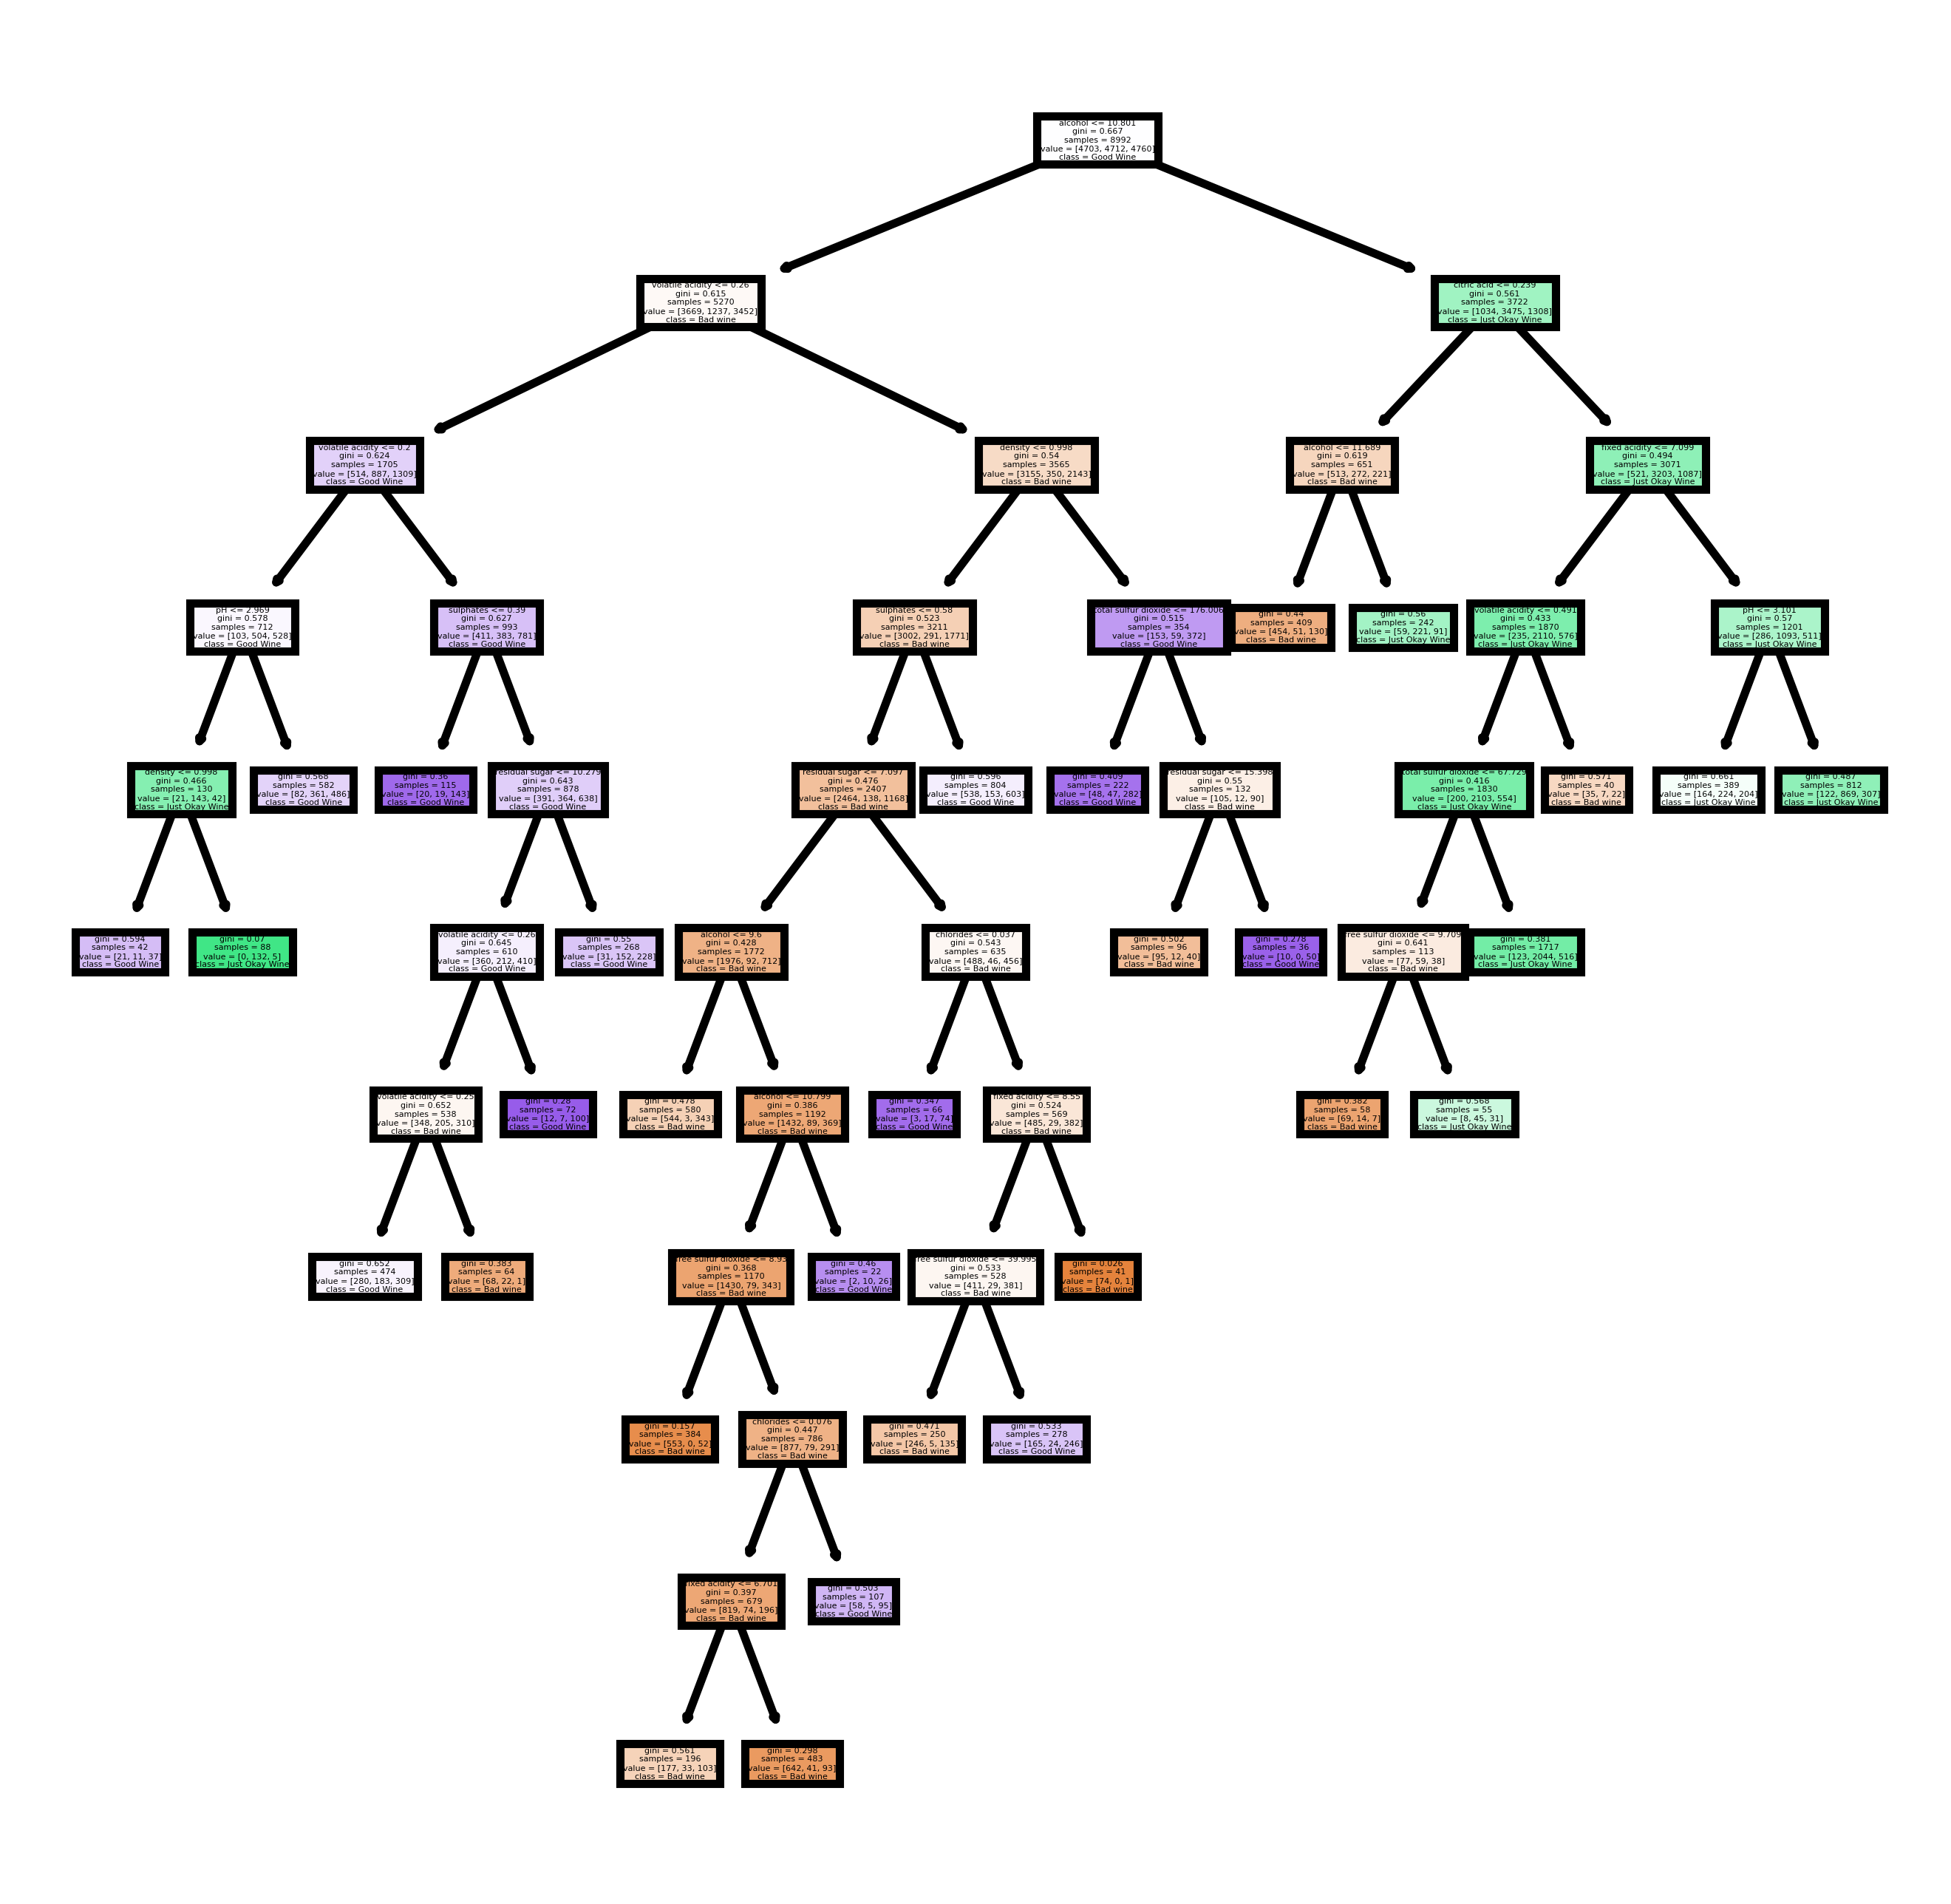

In [53]:
estimator_RFSMOTE = RandomForestClassifier(n_estimators = 200, max_features = 'sqrt', max_leaf_nodes=30, random_state = 10152020)
estimator_RFSMOTE= estimator_RFSMOTE.fit(X_resampled_SMOTE, y_resampled_SMOTE)
#Used https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html to identify how to use
#I got the following from https://stackoverflow.com/questions/40155128/plot-trees-for-a-random-forest-in-python-with-scikit-learn

fn=varlist
cn=['Bad wine', 'Just Okay Wine', 'Good Wine']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(estimator_RFSMOTE.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
#fig.savefig('rf_individualtree.png')

print('Accuracy of Random Forest classifier on training set resampled with SMOTE methods: {:.2f}'
     .format(estimator_RFSMOTE.score(X_train, y_train)))

Accuracy of Random Forest classifier on training set resampled with SMOTE methods: 0.62


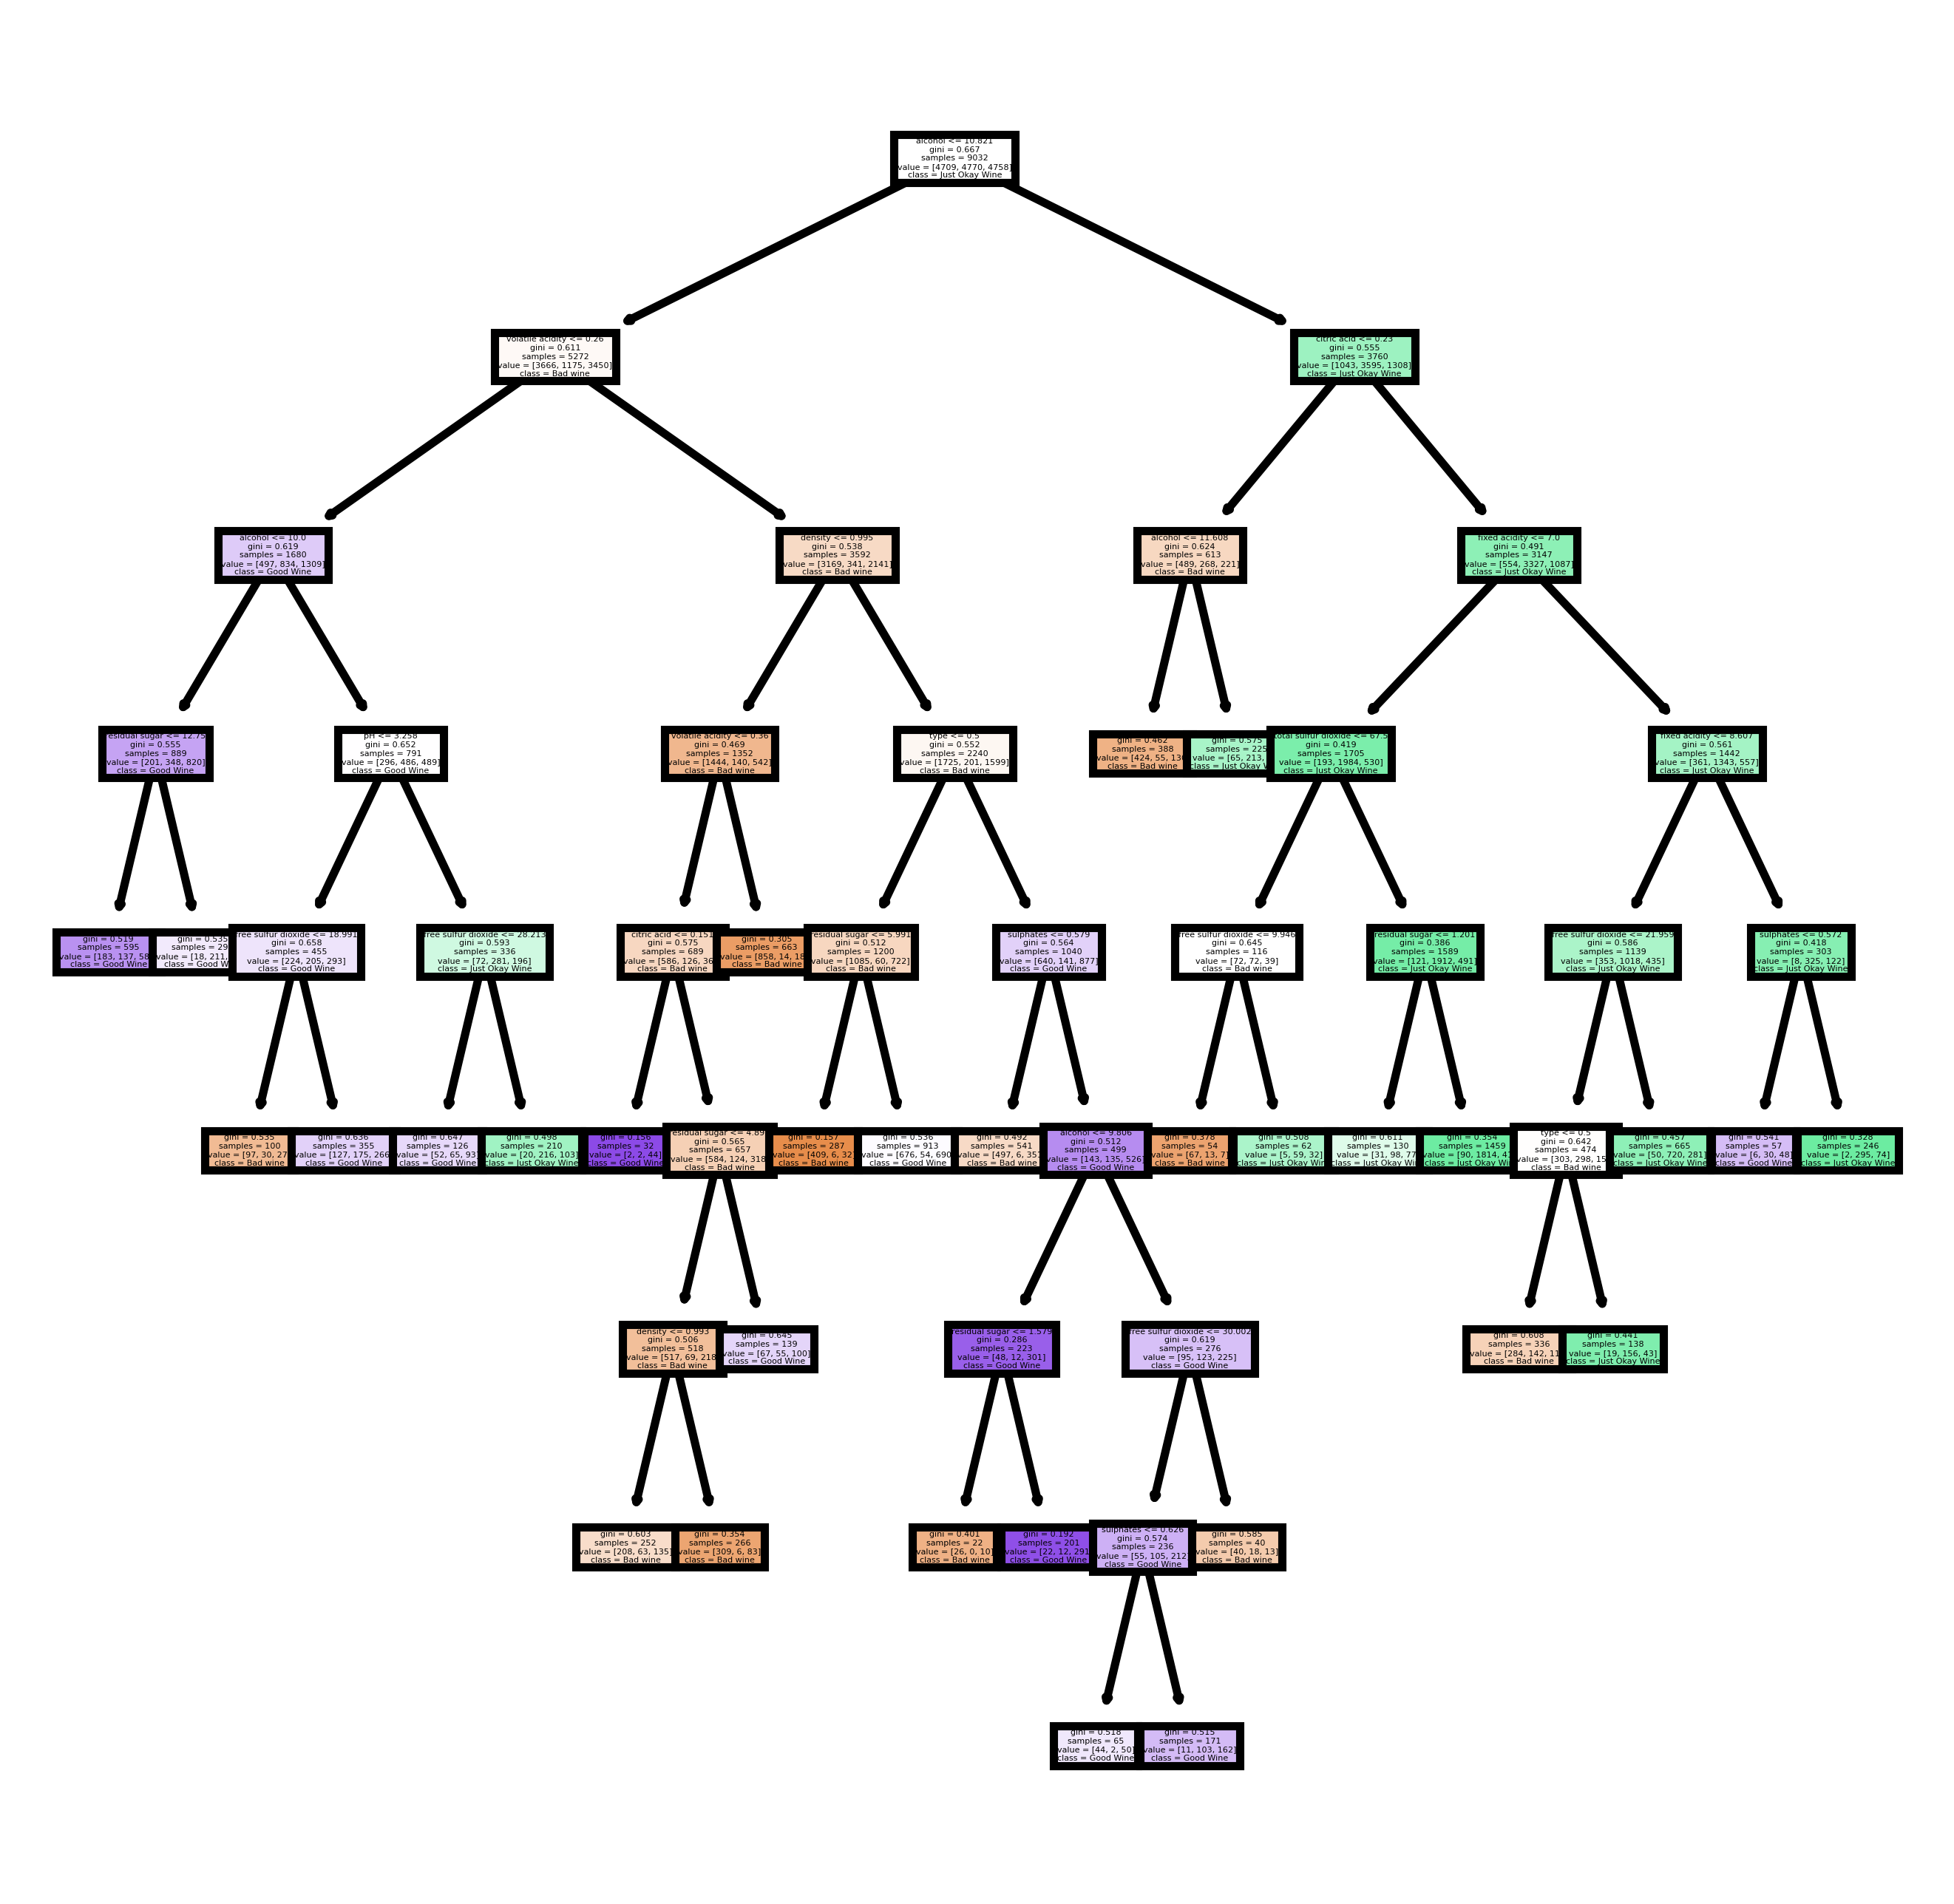

In [54]:
estimator_RFADASYN = RandomForestClassifier(n_estimators = 100, max_features = 'sqrt', max_leaf_nodes=30, random_state = 10152020)
estimator_RFADASYN= estimator_RFADASYN.fit(X_resampled_ADASYN, y_resampled_ADASYN)
#Used https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html to identify how to use
#I got the following from https://stackoverflow.com/questions/40155128/plot-trees-for-a-random-forest-in-python-with-scikit-learn

fn=varlist
cn=['Bad wine', 'Just Okay Wine', 'Good Wine']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(estimator_RFADASYN.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
#fig.savefig('rf_individualtree.png')

print('Accuracy of Random Forest classifier on training set resampled with SMOTE methods: {:.2f}'
     .format(estimator_RFSMOTE.score(X_train, y_train)))

In [55]:
### Before Finalizing the model, I will perform feature selection
sel = SelectFromModel(estimator_RFSMOTE)

In [56]:
sel.fit(X_resampled_SMOTE, y_resampled_SMOTE)

SelectFromModel(estimator=RandomForestClassifier(max_features='sqrt',
                                                 max_leaf_nodes=30,
                                                 n_estimators=200,
                                                 random_state=10152020))

In [57]:
sel.get_support()

array([False,  True, False, False, False,  True, False,  True, False,
       False,  True, False])

In [58]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

4

In [59]:
print(selected_feat)

Index(['volatile acidity', 'free sulfur dioxide', 'density', 'alcohol'], dtype='object')


In [62]:
# Bring in function from .py file
%run MidtermFunctionsUpdated.py

[0.81182905 0.81466478 0.81024706 0.80842446 0.81024706] [0.80080972 0.79352227 0.78444084 0.80713128 0.78768233]
Mean Training Accuracy: 0.811082482536337 Mean Test Accuracy: 0.7947172881711823
Classification Report
              precision    recall  f1-score   support

           0       0.12      0.70      0.21       234
           1       0.43      0.77      0.55      1213
           2       0.90      0.51      0.65      4725

    accuracy                           0.57      6172
   macro avg       0.48      0.66      0.47      6172
weighted avg       0.78      0.57      0.62      6172



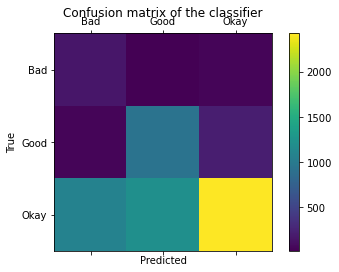

In [63]:
estimator_RFSMOTE2 = RandomForestClassifier(n_estimators = 200, max_features = 'sqrt', max_leaf_nodes=30,  random_state = 10152020)
estimator_RFSMOTE2= estimator_RFSMOTE2.fit(X_resampled_SMOTE[selected_feat], y_resampled_SMOTE)
Accuracy(estimator_RFSMOTE2, X_train[selected_feat], y_train, 5)
VizConfusionMatrix(estimator_RFSMOTE2, X_train[selected_feat], y_train)

### Feature selection using this method lowered accuracy. Based on the correlation analysis done in the cleaning stage of this project, I will remove the variables that have low correlations, leaving: volitile acidity, chlorides, density, alcohol, and type

[0.80595503 0.81142394 0.80417173 0.80194411 0.80984204] [0.79676113 0.78866397 0.78200972 0.79659643 0.78038898]
Mean Training Accuracy: 0.8066673705538715 Mean Test Accuracy: 0.7888840477955892
Classification Report
              precision    recall  f1-score   support

           0       0.12      0.56      0.19       234
           1       0.43      0.77      0.55      1213
           2       0.89      0.54      0.67      4725

    accuracy                           0.58      6172
   macro avg       0.48      0.62      0.47      6172
weighted avg       0.77      0.58      0.63      6172



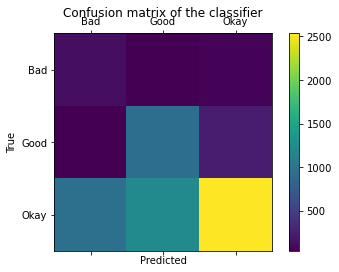

In [64]:
man_sel_feat = ['volatile acidity', 'chlorides', 'density', 'alcohol', 'type']
estimator_RFSMOTE2 = RandomForestClassifier(max_features = 'log2', max_leaf_nodes=30, random_state = 10152020)
estimator_RFSMOTE2= estimator_RFSMOTE2.fit(X_resampled_SMOTE[man_sel_feat], y_resampled_SMOTE)
Accuracy(estimator_RFSMOTE2, X_train[man_sel_feat], y_train, 5)
VizConfusionMatrix(estimator_RFSMOTE2, X_train[man_sel_feat], y_train)

In [65]:
#quick round of grid search to see if this can be optimized
clf.fit(X_resampled_SMOTE[man_sel_feat], y_resampled_SMOTE)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] max_features=sqrt, max_leaf_nodes=10, n_estimators=50 ...........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=sqrt, max_leaf_nodes=10, n_estimators=50, total=   0.3s
[CV] max_features=sqrt, max_leaf_nodes=10, n_estimators=50 ...........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_features=sqrt, max_leaf_nodes=10, n_estimators=50, total=   0.3s
[CV] max_features=sqrt, max_leaf_nodes=10, n_estimators=50 ...........
[CV]  max_features=sqrt, max_leaf_nodes=10, n_estimators=50, total=   0.3s
[CV] max_features=sqrt, max_leaf_nodes=10, n_estimators=50 ...........
[CV]  max_features=sqrt, max_leaf_nodes=10, n_estimators=50, total=   0.3s
[CV] max_features=sqrt, max_leaf_nodes=10, n_estimators=50 ...........
[CV]  max_features=sqrt, max_leaf_nodes=10, n_estimators=50, total=   0.3s
[CV] max_features=sqrt, max_leaf_nodes=10, n_estimators=100 ..........
[CV]  max_features=sqrt, max_leaf_nodes=10, n_estimators=100, total=   0.5s
[CV] max_features=sqrt, max_leaf_nodes=10, n_estimators=100 ..........
[CV]  max_features=sqrt, max_leaf_nodes=10, n_estimators=100, total=   0.5s
[CV] max_features=sqrt, max_leaf_nodes=10, n_estimators=100 ..........
[CV]  max_features=sqrt, max_leaf_nodes=10, n_estimators=100, total=   0.5s
[CV] max_features=sqrt, max_leaf_nodes=10, n_e

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  2.2min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, verbose=2)

In [66]:
print("best parameters  are: ", clf.best_params_)

best parameters  are:  {'max_features': None, 'max_leaf_nodes': 30, 'n_estimators': 200}


[0.81020863 0.81952603 0.80619684 0.81247469 0.81308222] [0.79433198 0.78866397 0.78444084 0.80794165 0.77876823]
Mean Training Accuracy: 0.8122976806260297 Mean Test Accuracy: 0.7908293361504997
Classification Report
              precision    recall  f1-score   support

           0       0.12      0.63      0.20       234
           1       0.43      0.74      0.55      1213
           2       0.89      0.54      0.67      4725

    accuracy                           0.58      6172
   macro avg       0.48      0.64      0.47      6172
weighted avg       0.77      0.58      0.63      6172



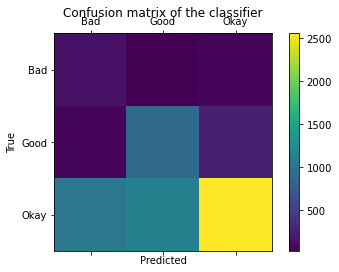

In [67]:
estimator_RFSMOTE2 = RandomForestClassifier(max_features = None, max_leaf_nodes=30, random_state = 10152020)
estimator_RFSMOTE2= estimator_RFSMOTE2.fit(X_resampled_SMOTE[man_sel_feat], y_resampled_SMOTE)
Accuracy(estimator_RFSMOTE2, X_train[man_sel_feat], y_train, 5)
VizConfusionMatrix(estimator_RFSMOTE2, X_train[man_sel_feat], y_train)

[0.82438728 0.82215921 0.82199271 0.8236128  0.82320778] [0.79838057 0.79919028 0.80470016 0.81361426 0.79821718]
Mean Training Accuracy: 0.8230719540901464 Mean Test Accuracy: 0.8028204909481034
Classification Report
              precision    recall  f1-score   support

           0       0.17      0.74      0.28       234
           1       0.44      0.79      0.56      1213
           2       0.91      0.58      0.71      4725

    accuracy                           0.62      6172
   macro avg       0.51      0.70      0.52      6172
weighted avg       0.79      0.62      0.66      6172



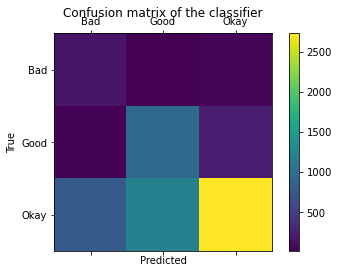

In [68]:
Accuracy(estimator_RFSMOTE, X_train, y_train, 5)
VizConfusionMatrix(estimator_RFSMOTE, X_train, y_train)

### None of this improved the accuracy and so I will move ahead with the model including all features

[0.82580514 0.82276686 0.8217902  0.82482787 0.82401782] [0.79919028 0.8        0.80307942 0.81442464 0.79821718]
Mean Training Accuracy: 0.8238415784531103 Mean Test Accuracy: 0.8029823030334844
Classification Report
              precision    recall  f1-score   support

           0       0.18      0.78      0.29       234
           1       0.42      0.75      0.54      1213
           2       0.90      0.56      0.69      4725

    accuracy                           0.61      6172
   macro avg       0.50      0.70      0.51      6172
weighted avg       0.78      0.61      0.65      6172



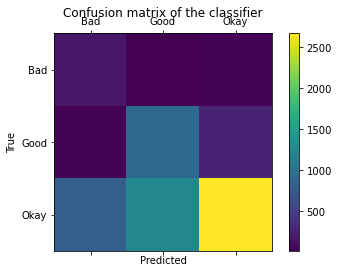

In [69]:
Accuracy(estimator_RFADASYN, X_train, y_train, 5)
VizConfusionMatrix(estimator_RFADASYN, X_train, y_train)

### The Smote data performed better overall

I will now evaluate the final model on the test data

In [70]:
test_report(estimator_RFSMOTE, X_test, y_test)

Confusion Matrix:
[[  8   1   3]
 [  0  50  14]
 [ 43  51 155]]
Classification Report
              precision    recall  f1-score   support

           0       0.16      0.67      0.25        12
           1       0.49      0.78      0.60        64
           2       0.90      0.62      0.74       249

    accuracy                           0.66       325
   macro avg       0.52      0.69      0.53       325
weighted avg       0.79      0.66      0.69       325



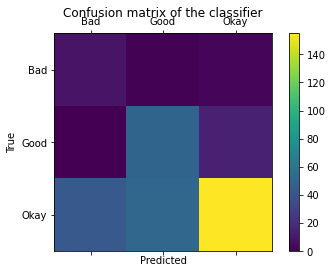

In [71]:
VizConfusionMatrix(estimator_RFSMOTE, X_test, y_test)

### Based on the above outcome, the best model is still not better than guessing all okay models, with a test accuracy of 65%, much lower than the 5-fold cross validation training accuracy of 82%. This indicates to me that the model may be over fitted, and that the data may be two low quality to create an adequate prediction model at this point. I probably need more robust data around the the extemely bad and extremely good wines to help build this model better. 